# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Abdul Majid Ridwan Tyastonoatmaja
- Email: abdulmajidr708@gmail.com
- Id Dicoding: abdulmajid708

## **Persiapan**

### Menyiapkan library yang dibutuhkan

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

### Menyiapkan data

In [251]:
student_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv', sep=";")

## **Data Understanding**

### Detail dan tipe dataset

In [252]:
#menampilkan beberapa baris pertama data
print(student_df.head())

   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1   

In [253]:
#menampilkan informasi umum tentang data
print(student_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [254]:
student_df.shape

(4424, 37)

In [255]:
student_df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [256]:
student_df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [257]:
student_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## **Data Preparation / Preprocessing**

### EDA(Exploratory Data Analys)

In [258]:
student_df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [259]:
student_df.duplicated().sum()

0

In [260]:
student_df['dropout'] = student_df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [261]:
student_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


In [262]:
student_df.drop('Status', axis=1, inplace=True)

In [263]:
student_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [264]:
def detect_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

        print(f'{column}:')
        print(f' Lower Bound: {lower_bound}')
        print(f' Upper Bound: {upper_bound}')
        print(f' Number of Outliers: {outliers.shape[0]}')
        print(f' Outliers: {outliers.values}\n')

        # Visualisasi Boxplot
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()


Marital_status:
 Lower Bound: 1.0
 Upper Bound: 1.0
 Number of Outliers: 505
 Outliers: [2 2 4 2 4 2 2 2 2 2 4 3 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2 2 4 4 3 2 2 2 2
 2 2 2 4 2 2 4 2 2 2 2 4 4 2 3 4 4 2 2 2 2 2 5 2 2 2 2 2 2 4 2 4 2 4 2 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 2 2 6 4 4 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 5 4
 4 2 4 6 2 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 3 2 2 2 4 2 4 2 2 2 2 4 2
 2 2 2 4 2 2 5 2 2 6 5 5 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 4 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 4 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 4 4 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 6 4 4 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 4 2 4 2 2 2 2 2 5 2 2 4 4 2 2 2 2 2 2 2 2 2 4 2 6 6 2 5 2 2 2 2 4 2
 2 2 2 4 2 2 5 2 5 2 2 4 2 5 2 2 5 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 4 5 4 2 2
 2 4 2 2 2 2 2 5 2 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 2 4 2 5 2 5 2 5 5 2 2 4 2 4 2 2 4 2 2 4 2 2 2 2 4 2 2 2 4 2 5 5 2 4 2
 4 4 2 2 2 2

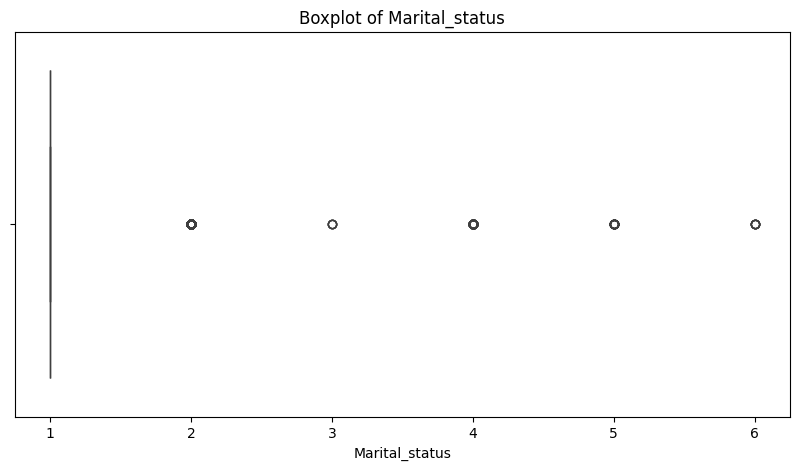

Application_mode:
 Lower Bound: -56.0
 Upper Bound: 96.0
 Number of Outliers: 0
 Outliers: []



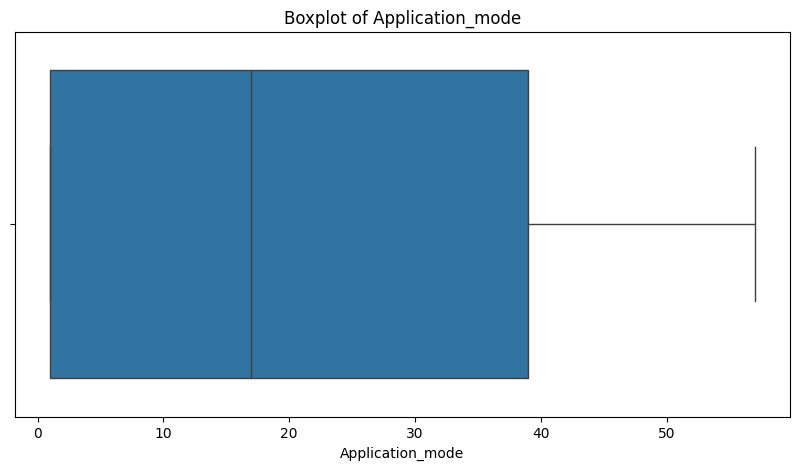

Application_order:
 Lower Bound: -0.5
 Upper Bound: 3.5
 Number of Outliers: 541
 Outliers: [5 5 4 4 4 4 5 6 6 4 4 4 4 6 6 5 5 4 4 5 6 6 4 6 5 6 5 4 5 5 4 4 6 4 4 4 4
 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 6 4 6 4 4 4 4 6 6 4 6 5 6 5 4 4 6 5 6 6 6 5
 6 4 6 6 4 4 5 4 5 6 6 5 4 5 5 6 4 4 5 4 4 4 4 4 5 6 4 4 5 4 4 6 6 4 4 4 6
 4 5 6 5 5 4 5 6 4 5 4 4 6 6 5 6 6 4 4 4 5 5 4 6 6 4 4 4 6 6 4 4 5 6 6 4 6
 5 5 5 5 4 5 5 5 6 4 5 4 4 4 6 5 6 5 5 5 4 4 5 5 6 6 4 5 6 5 5 5 4 4 6 5 4
 4 4 4 6 5 6 5 4 5 4 5 4 4 5 4 6 5 4 4 4 6 5 4 5 4 4 6 5 4 5 6 4 6 6 4 5 5
 6 6 4 5 4 4 4 6 4 4 4 4 4 4 4 5 5 5 6 4 4 5 4 4 6 6 5 4 5 5 4 6 4 5 4 5 6
 5 4 5 5 5 5 4 6 4 4 4 4 6 5 4 6 4 6 5 5 4 4 4 4 4 5 5 6 4 5 4 4 5 5 5 5 4
 4 4 5 6 6 4 4 6 6 4 4 6 5 4 5 4 4 4 4 4 4 5 4 4 4 9 4 5 5 4 5 4 5 4 4 4 4
 4 6 4 4 4 4 5 6 5 5 5 4 4 6 4 6 4 6 5 4 6 6 4 6 4 6 4 5 4 4 5 4 6 4 6 6 4
 4 6 5 4 5 4 4 6 6 4 4 4 4 6 5 4 4 5 4 5 6 6 5 5 4 5 4 6 5 4 6 5 6 4 5 5 4
 6 4 6 5 4 6 6 4 6 4 4 4 4 6 6 4 4 5 5 6 5 4 4 6 6 4 5 6 4 5 6 5 6 4 5 4 4
 5 6 5 4

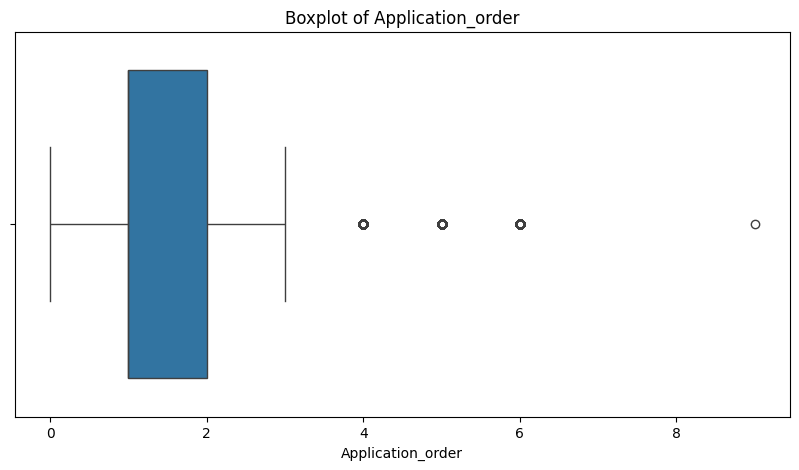

Course:
 Lower Bound: 8378.5
 Upper Bound: 10262.5
 Number of Outliers: 442
 Outliers: [ 171 8014  171 8014   33 8014  171  171  171  171 8014 8014 8014  171
 8014  171  171 8014 8014 8014 8014 8014  171 8014 8014 8014 8014 8014
 8014  171 8014 8014  171 8014 8014 8014  171 8014 8014 8014   33 8014
 8014 8014  171  171  171 8014  171 8014 8014  171 8014 8014 8014 8014
  171   33 8014 8014 8014 8014   33  171 8014  171  171  171  171 8014
 8014 8014  171  171 8014  171  171  171  171  171 8014  171 8014 8014
 8014 8014 8014 8014  171 8014 8014  171  171 8014 8014  171  171  171
  171 8014  171  171 8014 8014  171 8014 8014 8014  171 8014 8014 8014
  171  171  171  171 8014  171  171  171  171 8014  171 8014  171  171
  171 8014  171 8014  171  171  171  171  171  171 8014 8014 8014 8014
  171   33 8014  171  171  171 8014  171  171  171 8014 8014 8014 8014
 8014  171  171  171  171 8014  171  171  171  171 8014  171  171  171
 8014 8014  171 8014  171  171  171  171  171  171  171 8014 

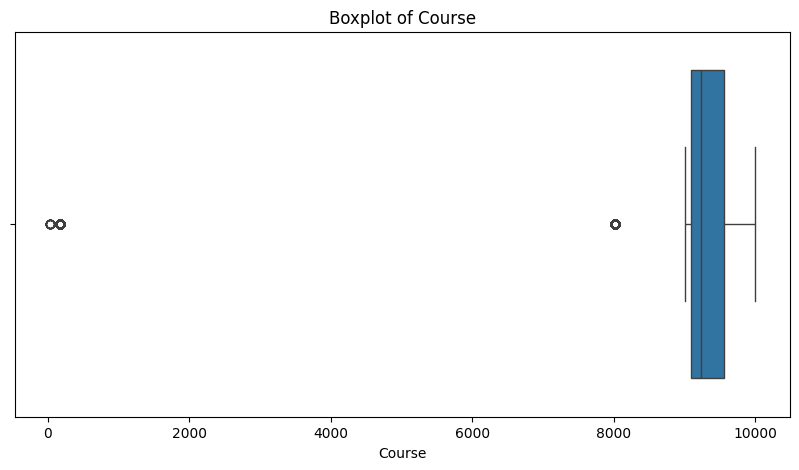

Daytime_evening_attendance:
 Lower Bound: 1.0
 Upper Bound: 1.0
 Number of Outliers: 483
 Outliers: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


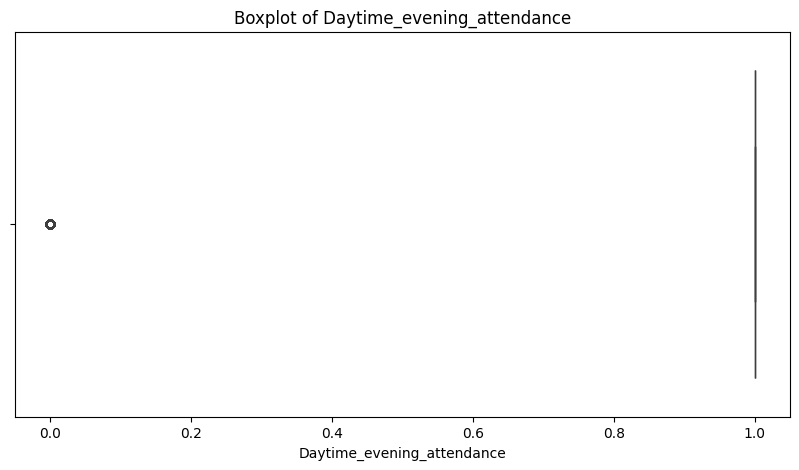

Previous_qualification:
 Lower Bound: 1.0
 Upper Bound: 1.0
 Number of Outliers: 707
 Outliers: [19 42 39 10 39 39  3 40 39 19 39  2  4 10 42 12 39  3  3 39 19 40  3 39
 19 40 43  3  3 19  3 39 19 40 39  3 12 15 39 39  3 39 40  6 39 39 40  3
 19 43 42 19 19 39 19 42  3 39 39 39 40 40  3 40 39 19  3 19  9  3 39  3
 19  3 19 19 19 39 39 39 39 40 19 39 39 42  6 19  9 39  3  3 40  3 39 39
  3 42 19 39 39 39 19 39 19 19 39 19 19 19 39 39 19  4 12 19  9  6 19  3
  3 39 12 39  6 19 19 39 39 40 39 42  9 39 12 12 39 39  3 19 39  6  3 39
 39 39  3  9 39 19 19  3  3 19 39 19 19  3 39 39 12 19 19 19  6  4 39  3
 39 42 39 40 39 12 42 40 39  3  6 42 39 39  3 39 19 40 40  3 42  3  3 40
  3 40 19  3 19  3 19 39 19 19 42  3 39 19 39 42 40 39 19 39 42 42  3 42
 19 19 39  9 42 38  3  3 39 19 39 19 39 39 39 39 42 19 19 42 39 19 19 40
 39 40  5 12  4 39  3 12  2  9  2 40 39 19 12  2 19 39 39 19 42 15 19 39
 19 19 12  9 40 42 39 39 40  3  3  3 19 39 39 19 39 39 19 39 39 39 42 39
  3  3 19  3 19  3 19  3 19 

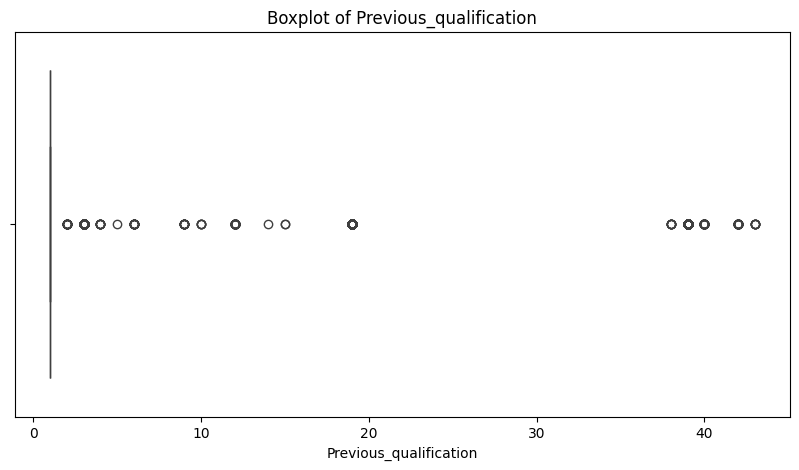

Previous_qualification_grade:
 Lower Bound: 102.5
 Upper Bound: 162.5
 Number of Outliers: 179
 Outliers: [100.  167.  178.   99.  170.  100.  100.  170.  100.  188.   96.  170.
 166.   96.  102.  101.  100.  100.  180.  172.  102.  170.  180.  100.
 100.  170.  100.  100.  165.  190.  100.  100.  100.  164.  163.  100.
 100.  170.  100.  163.  165.  102.  100.  175.  163.  170.  100.  176.
 100.  170.  100.  168.  168.  101.  170.  170.  180.  100.  100.   97.
 100.  172.  164.  101.  100.  164.  100.  168.  100.  170.  164.  100.
 170.  184.4 100.  100.  100.  100.  174.  170.  182.  167.  180.  170.
  99.  178.  100.  100.  170.  100.   95.  100.  100.  100.  100.  172.
 170.  100.  100.  170.  166.  100.  100.  190.  163.3 100.  163.  165.
 172.  100.  100.  100.  101.  100.  170.  100.  168.  100.  100.  164.
 163.  170.  100.  100.  100.  100.  100.  100.  172.  169.  100.  100.
 180.  177.  165.  101.  100.  177.  170.  170.  102.  100.  100.  102.
 170.  100.  172.  100.  100. 

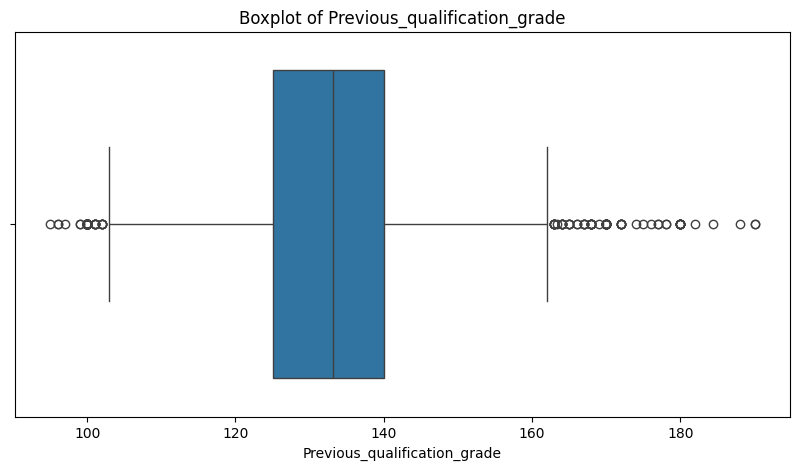

Nacionality:
 Lower Bound: 1.0
 Upper Bound: 1.0
 Number of Outliers: 110
 Outliers: [ 62   6  41  41  26  26 103 103  13  41  41  41  41  41  25  41  21   6
   6  41  26   6  41 101  11  11  22  41  22  41  32  41 100  24  26  24
  41   6  41  26   6 109  41  41  26  41  41  26  22  26  22 100  22  41
   2  41  11   6  26 101   6  22 108  22  62  41  26  22  26  41  26  41
  41  22  41  24   6   6  22 105   6  41  41   6  41  21  41  41  41  41
  14  24  41  24  41  25   2  41  22  41  26   6  22 100 103  41  26  17
 105  22]



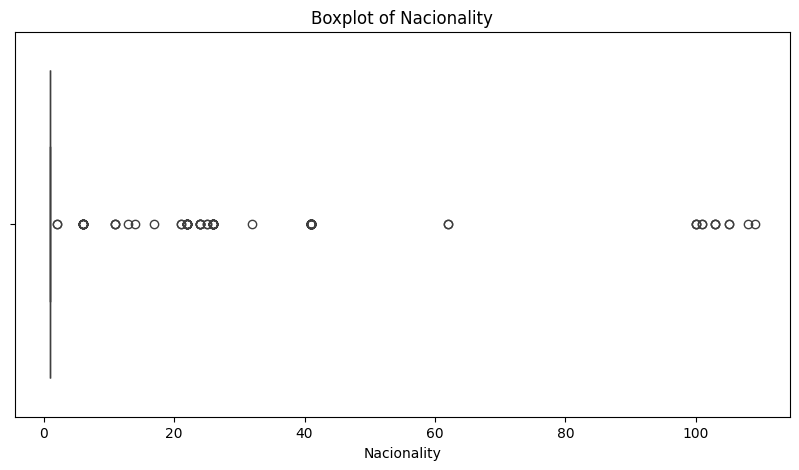

Mothers_qualification:
 Lower Bound: -50.5
 Upper Bound: 89.5
 Number of Outliers: 0
 Outliers: []



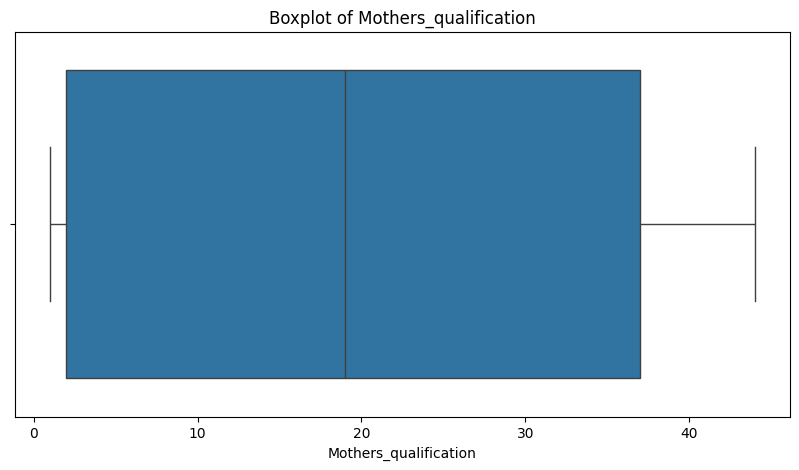

Fathers_qualification:
 Lower Bound: -48.0
 Upper Bound: 88.0
 Number of Outliers: 0
 Outliers: []



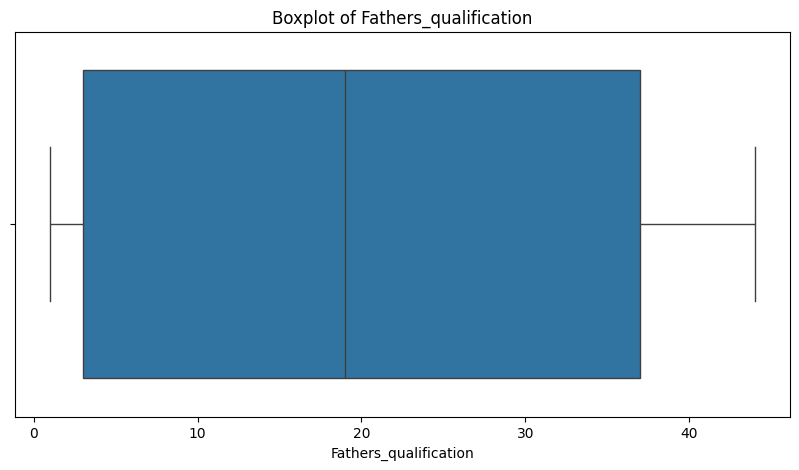

Mothers_occupation:
 Lower Bound: -3.5
 Upper Bound: 16.5
 Number of Outliers: 182
 Outliers: [125  90 141  90 175  90  99  90 191  90  90  90 191 141  90  90  99 191
  90 151  99 194 141  90 194 191 191 194  90  90  90  90  90  90 192 132
  90 152 194  90 191 194 175  90 191  90 192 191 134 191 191 132  90 194
 192 194  90 191 143 194 123 191  90  90 143 143  90 191  90  90 132  90
  99  90  90 191 123 173 191  90  90 191 191 193  90  99 175  90 151 191
  90  99  90  90  90  90  90 192  90  90 122 191 194 141 192 134  99 134
 175 141  90  90 144 191 191  90 131  99 144  90  90  90  99  90  90  90
 123  90 171 123  90 123  90  90 194 144  90 175  99  90 153 191 191  90
 134 194  99 144 193 141 191 123  99 144 141  99 151 144  90  90  99  90
 141  90  90  90 153 152  90 122 191 193  99  90  90 191  99  90 123 193
  99  90]



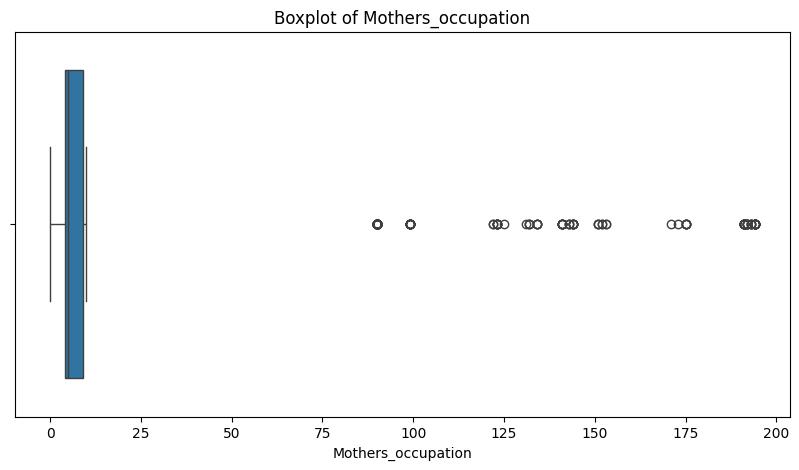

Fathers_occupation:
 Lower Bound: -3.5
 Upper Bound: 16.5
 Number of Outliers: 177
 Outliers: [124  90 175  90 121  99 144  90  90 195 192  90  99 175 161  99 193 151
  90 193 182 193 193  90  90  90 132  90  90 193 131  90 193 194 193  90
  90 163  90 144 192 135 143  99 171  90  90  90 103 171 192 163 193 172
 103 152  90 175  90  90 152 163  90 183  90  90  99 122  90  90  99  90
 171 171 183 192  90  90 172 102 181  90  90 183 193 144  90  99  90  90
  90  90  90 144  90  99 171 175 171 192 193  99 134 103 192  90 123 171
 163  90  90 181  90  99 144  90  90  90  99  90  90  90 103  90  90  90
 163 112 135  90  90 193  90 181  90 152  99 153 174 193 112 193  99 144
 144 193 102 122  99 141 114  99 151 123  90  90  99 182  90  90  90 135
 171 144 193 101  99  99  90  90 154  90 123  90 194  99  90]



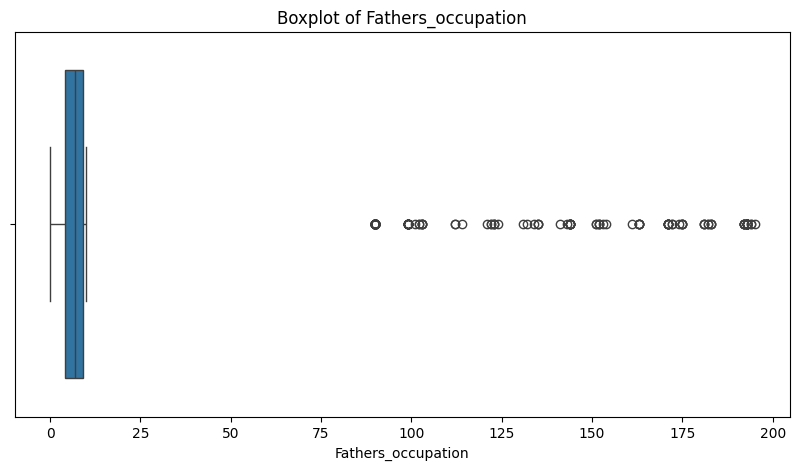

Admission_grade:
 Lower Bound: 92.55
 Upper Bound: 160.15000000000003
 Number of Outliers: 86
 Outliers: [180.4 161.  174.7 170.  162.3 163.4 166.9 178.3 172.  183.5 170.  180.
 163.5 161.9 166.6 170.  162.9 190.  170.  170.  162.5 162.  175.6 164.9
 161.9 184.  168.5 169.7 170.  171.2 163.7 168.  180.  164.3 161.2 165.8
 190.  161.  172.  161.5 170.  184.4 170.  162.  176.7 180.  170.  161.9
 178.  161.1 160.6 170.  165.7 170.  190.  163.3 161.8 163.6 167.3 168.2
 170.  166.  161.2 169.2 170.  160.5 163.3 176.  162.3 173.3 162.2 165.8
 165.2 167.1 162.3 162.4 180.  168.6 179.6 162.5 163.  170.  160.4 163.1
 162.1 166. ]



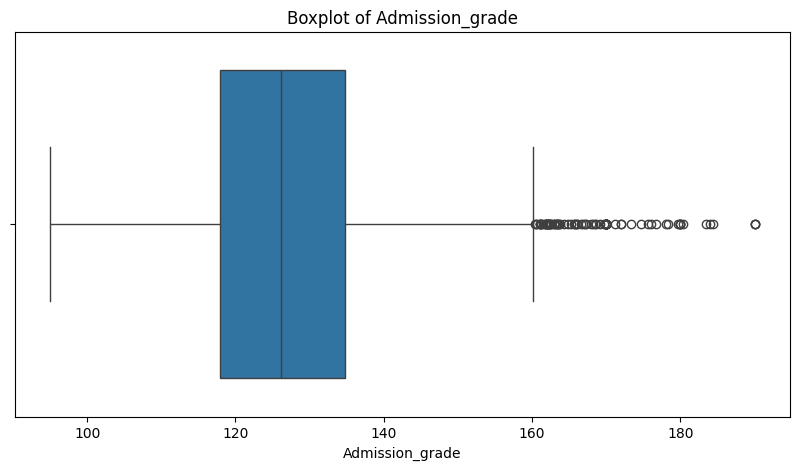

Displaced:
 Lower Bound: -1.5
 Upper Bound: 2.5
 Number of Outliers: 0
 Outliers: []



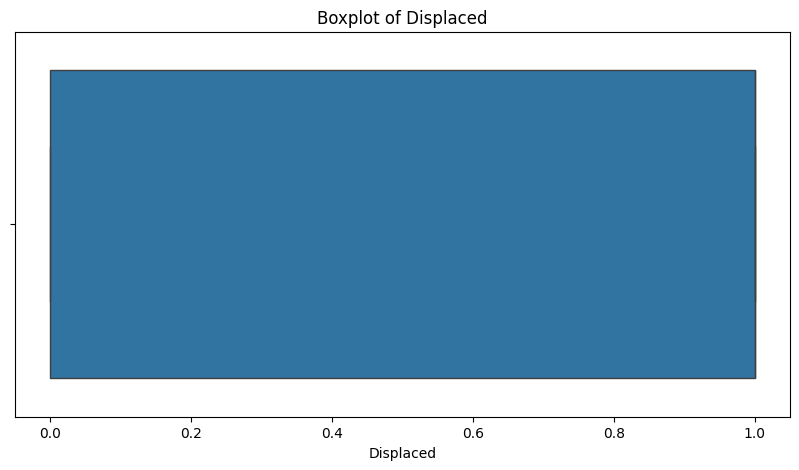

Educational_special_needs:
 Lower Bound: 0.0
 Upper Bound: 0.0
 Number of Outliers: 51
 Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]



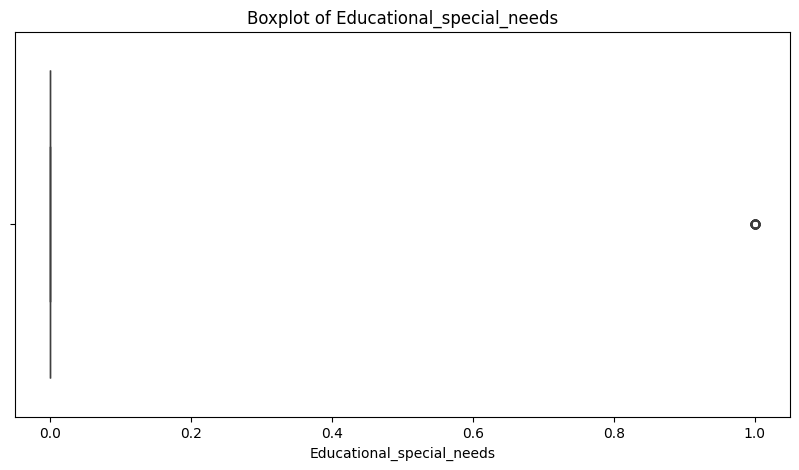

Debtor:
 Lower Bound: 0.0
 Upper Bound: 0.0
 Number of Outliers: 503
 Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1

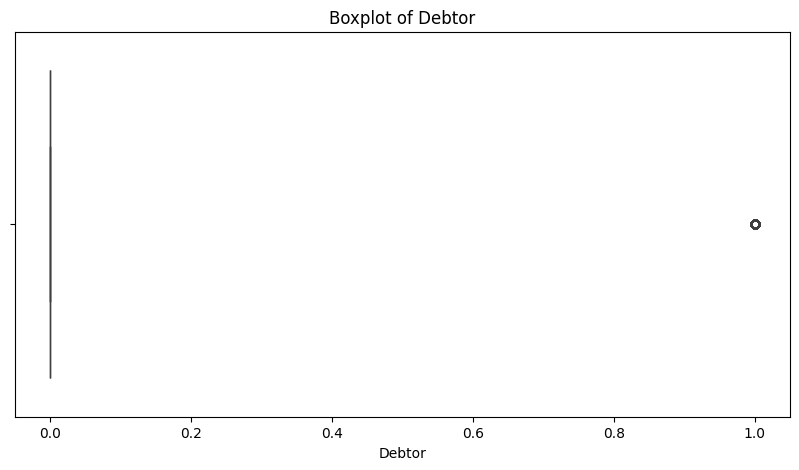

Tuition_fees_up_to_date:
 Lower Bound: 1.0
 Upper Bound: 1.0
 Number of Outliers: 528
 Outliers: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

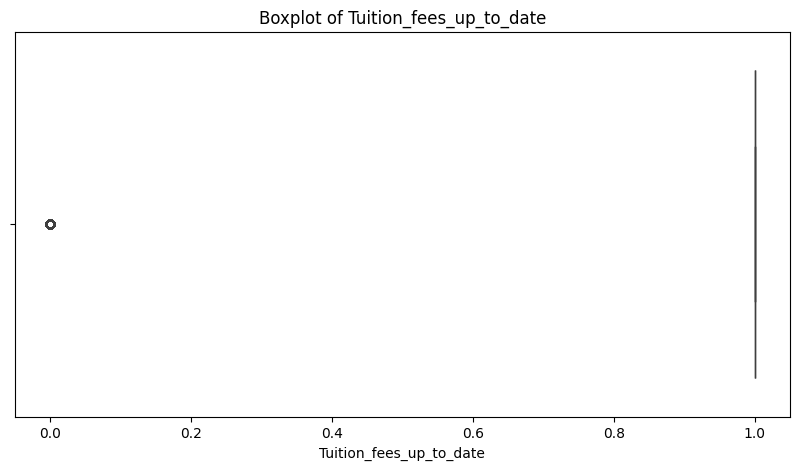

Gender:
 Lower Bound: -1.5
 Upper Bound: 2.5
 Number of Outliers: 0
 Outliers: []



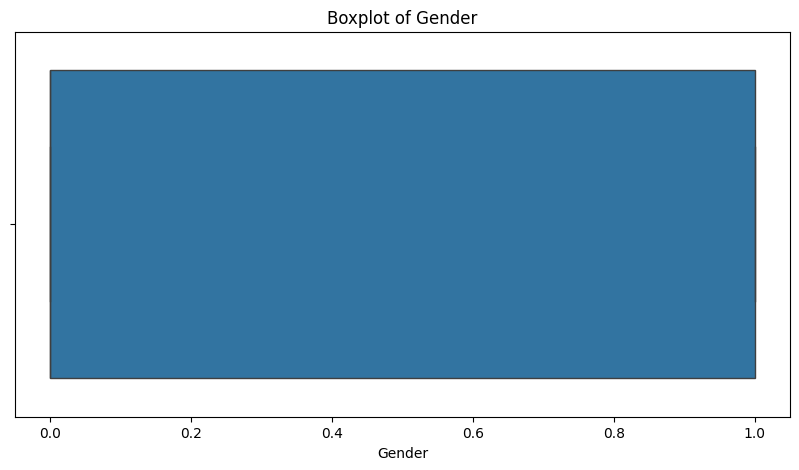

Scholarship_holder:
 Lower Bound: 0.0
 Upper Bound: 0.0
 Number of Outliers: 1099
 Outliers: [1 1 1 ... 1 1 1]



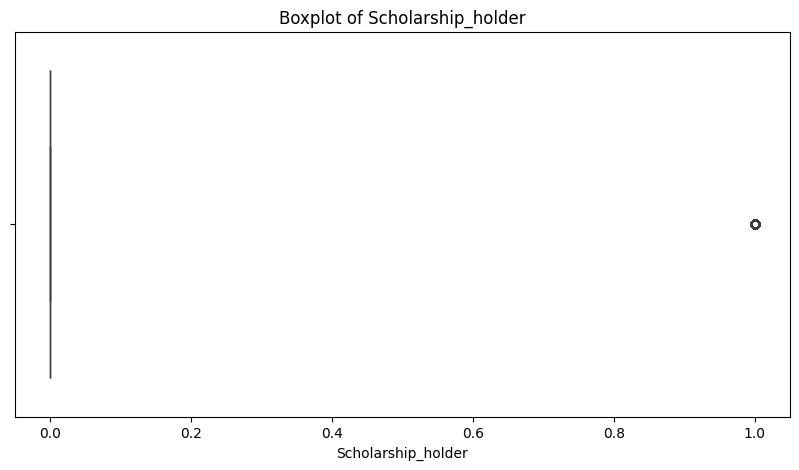

Age_at_enrollment:
 Lower Bound: 10.0
 Upper Bound: 34.0
 Number of Outliers: 441
 Outliers: [45 50 37 43 55 39 39 35 39 44 36 43 47 35 35 35 36 45 38 37 47 40 35 36
 39 44 50 35 42 36 44 36 40 39 39 50 48 50 44 49 46 41 43 70 48 41 35 44
 45 39 49 43 47 37 41 60 47 50 45 45 43 44 53 37 35 41 51 35 52 46 41 40
 37 54 36 47 46 53 38 42 37 43 41 35 39 37 37 61 45 58 49 40 48 39 41 40
 41 35 37 38 36 45 39 37 43 35 35 35 35 36 58 35 39 35 39 47 39 39 59 41
 41 38 35 39 37 37 35 49 52 37 45 38 55 46 46 37 36 50 47 48 53 42 52 54
 49 37 35 38 38 37 40 44 38 44 36 35 42 40 38 44 39 41 35 37 41 35 48 51
 44 44 35 45 51 49 37 42 35 37 47 37 48 49 54 41 42 50 59 44 37 36 49 47
 49 40 39 50 38 40 46 37 40 43 35 44 45 52 35 36 47 41 51 43 41 47 41 43
 36 35 35 39 35 44 53 44 55 43 44 36 45 45 44 42 43 40 46 37 37 41 40 36
 35 50 35 43 57 38 45 43 49 43 43 40 43 36 46 41 36 42 47 48 38 37 45 37
 37 36 39 46 50 37 46 37 50 39 53 54 48 50 41 43 50 60 41 47 41 50 53 54
 49 45 47 43 54 39 39 44 45 40 

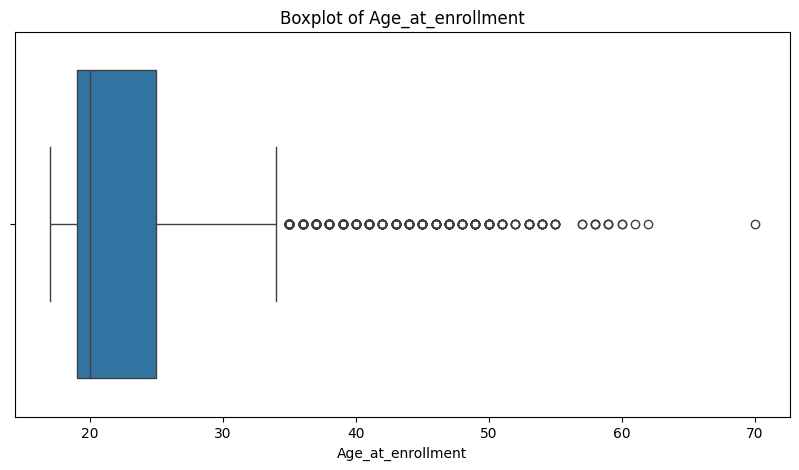

International:
 Lower Bound: 0.0
 Upper Bound: 0.0
 Number of Outliers: 110
 Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]



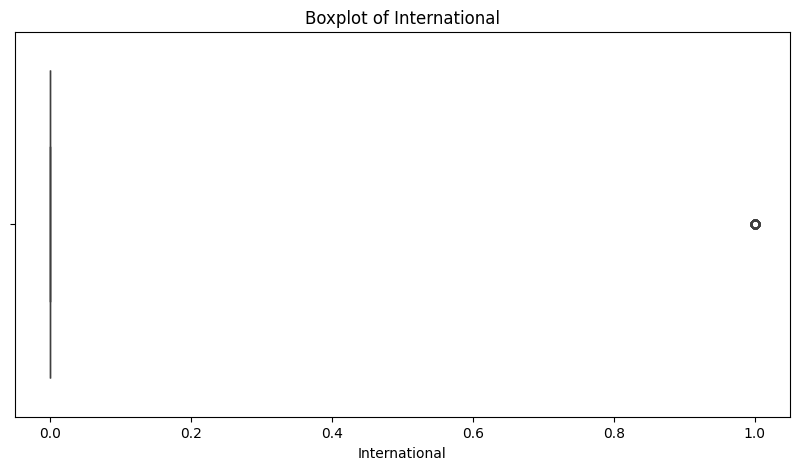

Curricular_units_1st_sem_credited:
 Lower Bound: 0.0
 Upper Bound: 0.0
 Number of Outliers: 577
 Outliers: [ 2  2  3  3  2  6  2  7 13  4  2  1  5  1  2 19  2  5  3  2  2 11  5  6
  8  2  7  1  1  2  3  3  3 10  7  7  5  2  6 10  3  5  3  9  3  4  4  5
  7 15  2  4  2  1  1  1  2  5  9  7  2 10 12  4  5  7  3 14  6 12  9  3
  2  6  6  3 18  1  2  4  3  6 17  6  9  3  4  2  6  6  1 13 10  4 16  5
 12  8  4  2  6  2  2  1  3  2  2 11  2  8  4 11  4  3  4  6  2  6  4 10
  5  4  3  1  5  5  4  1  4  5  7  3 11  1  3  7  4  4  4  1  7  4  7  7
 12 13 11  3  7  1  5  2  2  6  2  5  7  6  3  7  1  4  3 14  2  3  2  6
 16  2  8  1  9  6  1  7  3  9 15  6  2 11  9 11  1  8  6  1  7  3  1  9
  2  9  1  5  6  7  2  1  1  1  2  1  2  4 13  9  7  5  2  2 11  4  5  1
  6  3  2  2  3  1  8  4  2  7  9  2  2  6  3  4 15  7  5  3  2  4  1  7
  8  5  3  3  2  2 14  4  3  1  5  2  7  2  1 10  2  1 10  1  3  2  8  1
  6  1  3  3  1  3  9  8 18  1  1  5  2  9  9  1  2  1  3  2  1  1 16  7
 11 13  8  4  7  

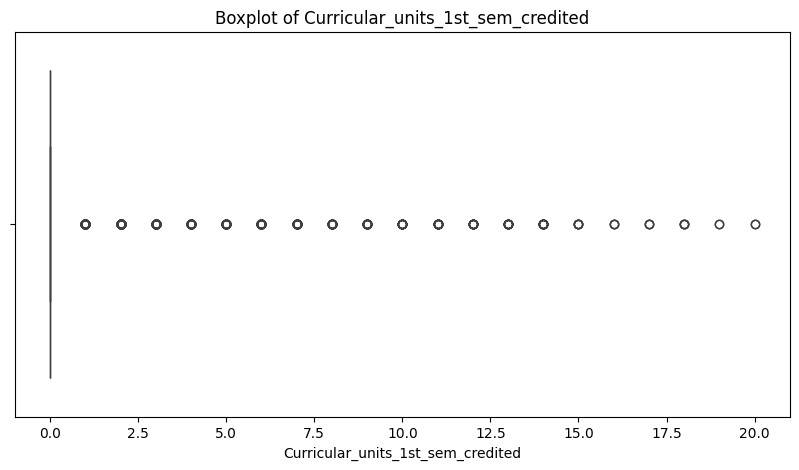

Curricular_units_1st_sem_enrolled:
 Lower Bound: 2.0
 Upper Bound: 10.0
 Number of Outliers: 424
 Outliers: [ 0  0  0  0  0  0  1 12  0 18  0  0  1 21 17 12  0 16  0 11 11 11 11 14
 11  0 13 12 11 16  0  0 11 14  0 12  0 15 18  0 12 16 11 17 11  0 12 19
 18 11 13  0  0 11 12 18  0 15 18  0 16 12  0  0  0  0 15  0  0 18 12  0
 11 12 15 11  0 11  0 12 11  0  0  0 12  0  0 11 11  0 13 18 14  0 11  0
 11 12 11 11  0  0  0  0  0 18  0  0  0 17  0 12  0 11 12 12  0 13  1  0
 17 12  0  0 16 13 15  0 12  0  0  0  0  0  0 12 13 13 12  0 12  0  0 12
  0  0  0 12 17 16 12 11 17  0 12  0 11 12 14 11 12  0  0  0  0  0 17  0
 11 11  0 12 11  0 15  0  0  0  0 12 17  0  0  0  0 13  0 11  0  0 14  0
  0  0  0  0  0  0 13 13 21 11  0 18 11  0  0  0 18 11 18  0 17  0  0 12
 12  0 14  0 15 12 18 17 11  0 12  0 23  0 12  0  0 21  0 14 16  0  0 13
  0 17  0 13  0  0 14  0 16 11  0 17 11  0  0 14  0  0 15 19 15 13  0 21
  1 17 15 15 12 13 11 12  0 12 13 15  0  0 12 12  0  0 11  0 18 12 11  0
  0 15 15 12 15 

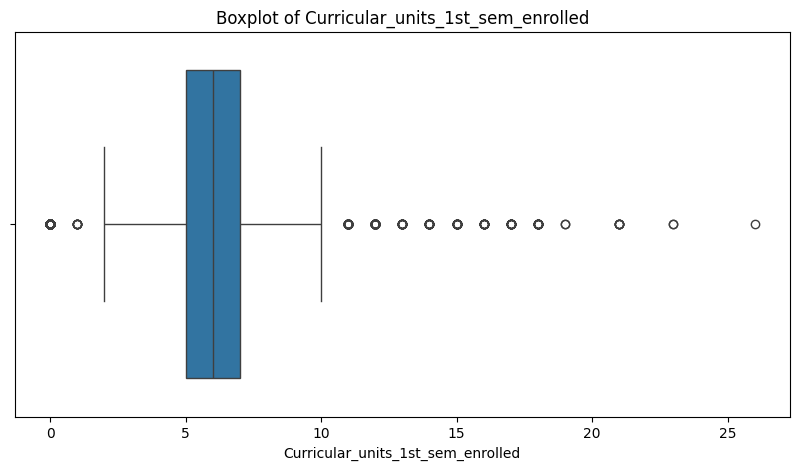

Curricular_units_1st_sem_evaluations:
 Lower Bound: 0.0
 Upper Bound: 16.0
 Number of Outliers: 158
 Outliers: [17 18 19 21 18 19 17 24 18 19 18 18 22 19 21 19 17 19 18 18 18 18 17 45
 24 18 19 17 45 17 18 20 18 17 18 21 19 17 17 21 18 22 26 17 21 18 17 17
 19 20 17 21 20 18 21 19 17 18 18 29 18 17 17 29 21 22 18 26 36 22 17 32
 19 20 23 24 17 19 27 31 23 20 23 18 21 26 23 19 28 20 17 24 20 21 23 22
 21 18 21 19 23 25 21 17 17 23 19 23 23 20 24 18 22 20 20 17 22 19 17 18
 17 22 17 21 20 17 19 20 19 17 18 18 33 17 17 21 19 18 18 19 19 17 25 27
 17 17 19 17 21 22 18 26 22 24 25 19 21 18]



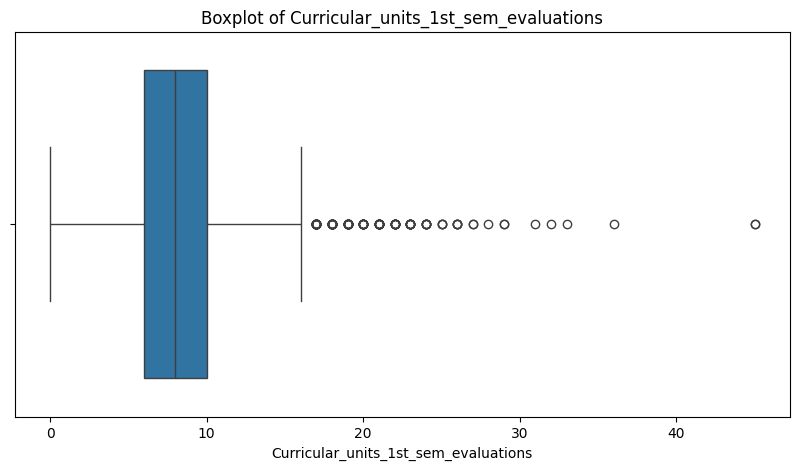

Curricular_units_1st_sem_approved:
 Lower Bound: -1.5
 Upper Bound: 10.5
 Number of Outliers: 180
 Outliers: [18 21 11 13 11 11 11 13 12 11 16 14 11 11 18 13 11 17 19 18 11 13 11 18
 12 18 16 13 18 12 12 15 11 11 11 11 11 13 18 12 12 11 11 18 17 11 11 12
 11 13 17 12 16 14 12 11 13 11 12 11 11 17 16 12 13 11 12 13 12 17 11 14
 12 14 11 11 12 21 11 17 18 12 13 15 11 13 11 12 20 20 14 15 11 17 12 15
 17 11 14 12 19 13 11 21 17 13 15 11 13 11 11 12 14 12 11 14 12 11 14 12
 11 15 20 15 12 11 14 11 13 12 18 11 13 12 11 13 14 18 13 13 18 12 11 18
 12 12 11 11 12 13 17 14 18 14 11 26 12 13 16 12 12 12 11 12 12 12 12 12
 12 13 12 18 13 21 12 13 12 14 13 12]



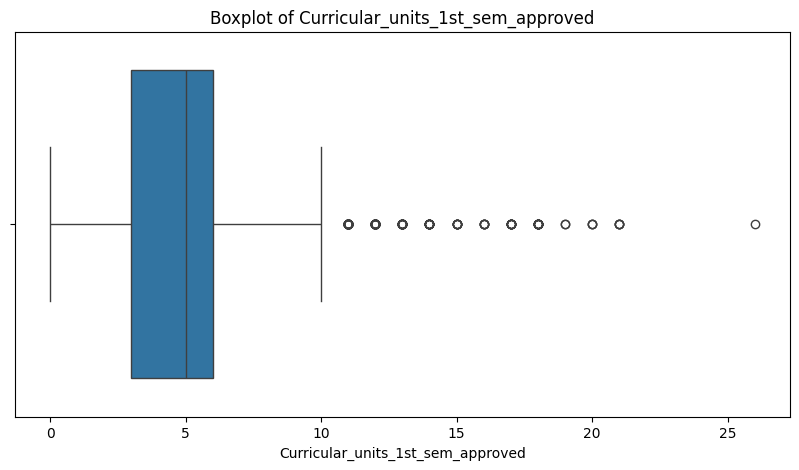

Curricular_units_1st_sem_grade:
 Lower Bound: 7.3999999999999995
 Upper Bound: 17.0
 Number of Outliers: 726
 Outliers: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         17.125       0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.       

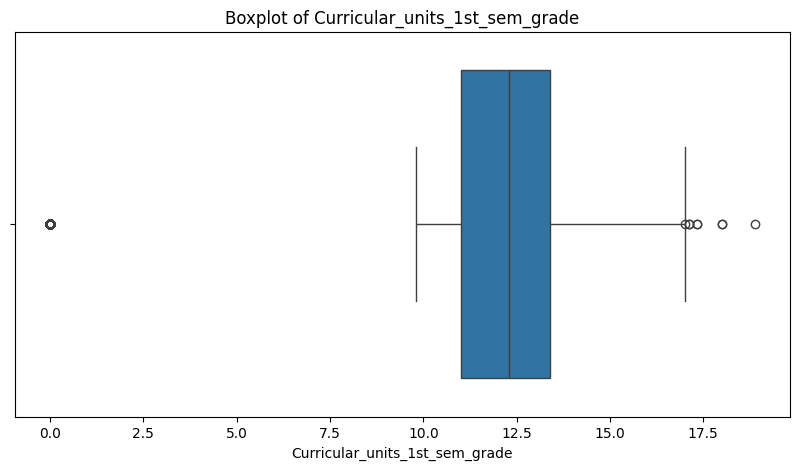

Curricular_units_1st_sem_without_evaluations:
 Lower Bound: 0.0
 Upper Bound: 0.0
 Number of Outliers: 294
 Outliers: [ 1  2  1  1  1  2  1  2  1  1  2  4  2  1  3  2  1  1  4  2  2  1  1  1
  2  1  1  2  2  6  1  3  1  4  1  1  1  3  2  4  1 12  2  1  2  2  1  4
  3 10  2  2  4  1  1  1  1  1  2  1  3  2  1  1  4  2  7  1  2  5  1  1
  2  3  1  1  1  1  2  1  1  2  3  3  1  2  1  1  1  1  2  1  4  1  1  1
  2  1  2  2  2  2  1  8  1  1  2  2  1  1  1  2  1  2  7  1  2  1  2  6
  1  8  1  2  2  2  4  1  1  1  1  2  4  1  1  1  1  1  1  8  2  1  1  3
  1  1  2  2  1  1  2  3  1  7  1  2  1  4  7  2  1  3  1  1  1  1  2  1
  1  1  1  1  2  4  2  1  1  1  1  1  6  1  3  3  2  1  6  3  1  1  1  1
  1  1  3  7  4  1  7  1  5  1  2  3  2  1  2  1  3  2  3  1  2  1  1  2
  1  2  3  2  1  3  1  2  5  1  8  1  5  1  1  1  2  1  1  2  1  1  2  1
 12  1  1  2  1  2  1  5  1  2  1  2  4  1  1  1  1  6  1  2  2  2  1  2
  1  2  2  2  1  6  1  2  3  1  1  1  1  1  3  1  3  1  4  1  2  2  1  1
  2  2

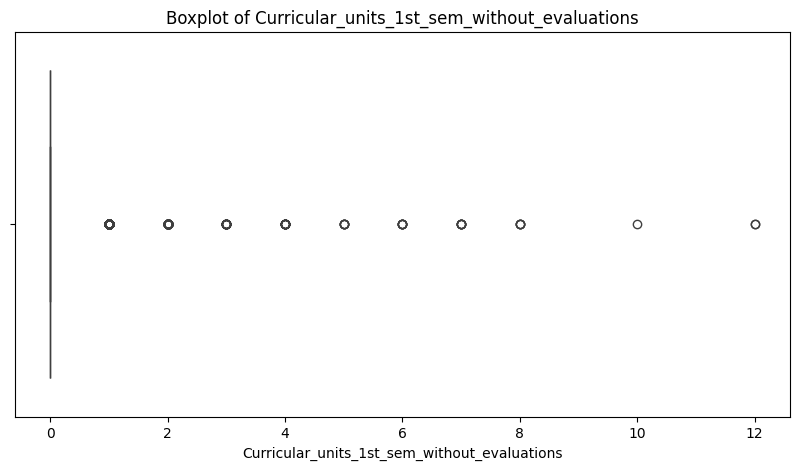

Curricular_units_2nd_sem_credited:
 Lower Bound: 0.0
 Upper Bound: 0.0
 Number of Outliers: 530
 Outliers: [ 1  2  5  2  1  7  4 10  5  1  2  1  3 13  2  2  1  9  4  2  6  1  5  1
  4  2  1  9  4  3  5  1  3  6  2  5  2  6  1  1  1  5  5  4  4 11  1  1
  3  3  5  2  9 11  3  1  3  1  4  2 13  6 11  5  2  3  4  2 12  1  1  1
  3  3 11  6  9  1  6  1  5  4  1 10 10  9  3  6  4  2  1  4  5  1  1  5
  5  1  6  5  4  5  2  9  5  2  2  4  2  4  4 10  3  1  2  4  5  1  1  3
  4  4  2  8  4  5  5  1  4  3  1  4  3  4  6  9 11 11  2  4  1  4  2  2
  3  2  5  3  1  2  4  2  3 10  5  4  1  2 14  5  4  2  3  4  4  4  3  7
 15  4  3 11  4  9  2  4  5  2  7  3  7  1  5  4  4  5  1  1  3  1  5 14
 10  8  8  5  1 10  2  4  3  1  1  3  2  6  9  3  1  4  7  1  1 16  4  4
  2  1  1  4  4  4  5  2  1 13  2  4  1  5  1  5  1  1  7  1  1  6  1  2
  6  1  5  1  1  6  2  5  5 12  5  1  6  6  1  1  3 12  4  8 10  3  2  5
  2  6  2  1  1  4 13  4  2  2  7 10  1  6  4  5  4  3  1 18  1  5  1  5
  1 10  1  7 11  

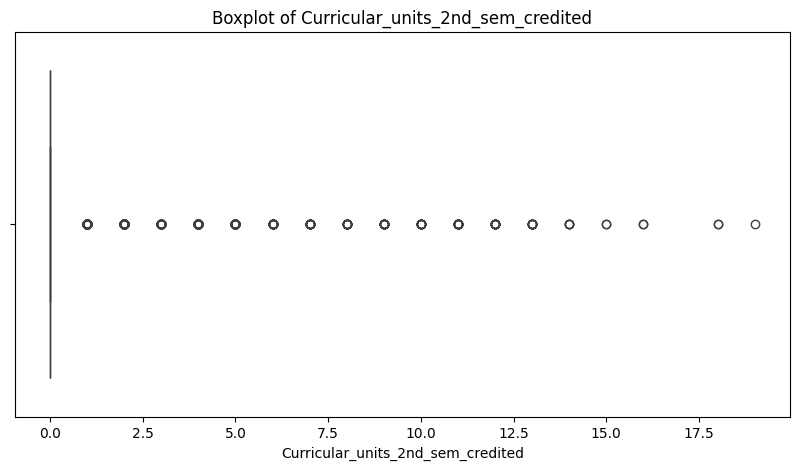

Curricular_units_2nd_sem_enrolled:
 Lower Bound: 2.0
 Upper Bound: 10.0
 Number of Outliers: 369
 Outliers: [ 0  0 11  0  0  0  0 12  0 13 11  0  0 19 13 12  0 13  0 11 11 11  0 12
 12 11 11 13  0  0  0 12  0 13 13  0 13 11 17  0 12 13  1 13 11  0  0 11
 13  0 14 12  0 11 11  0  0  0  0 11  0  0 13 12  0 11 11 14  0 11  0  0
  0  0  0  0  0 12 13 14  0  0  0  0  0  0  0 13  0  0  0 17  0 12  0 11
 11  0 12  0 17 11  0  0 13 12  0  0  0  0  0  0  0 13 11 12  0 11  0  0
  0  0  0 12 17 13 13 11 15  0 11  0 14 11  0  0  0  0  0 17  0  0 12 11
  0 13  0  0  0  0  1 11 12  0  0  0  0 11  0 11  0  0 12  0  0  0  0  0
  0  0 11 11 16  0 12  0  0  0 13 12  0 17  0  0 12  0 13  0 14 11 12 12
 12  0 11  0 23  0 12  0  0 14  0 13 13  0  0 11 11  1  0 17  0 11  0  0
 14  0 11  0 12  0  0 14  0  0 13 13 13 11  0 19 17 15 13 13 12  0 12 14
  0  0 11 12  0  0  0 17 11  0  0 14 14 11 14 23  0  0 13  0  0 11 12  0
  0  0 11 13 13  0 11 11  0  0 14 14 11  0 12  0 11 14 13  0  0  0  0 17
 13 18 11  0 12 

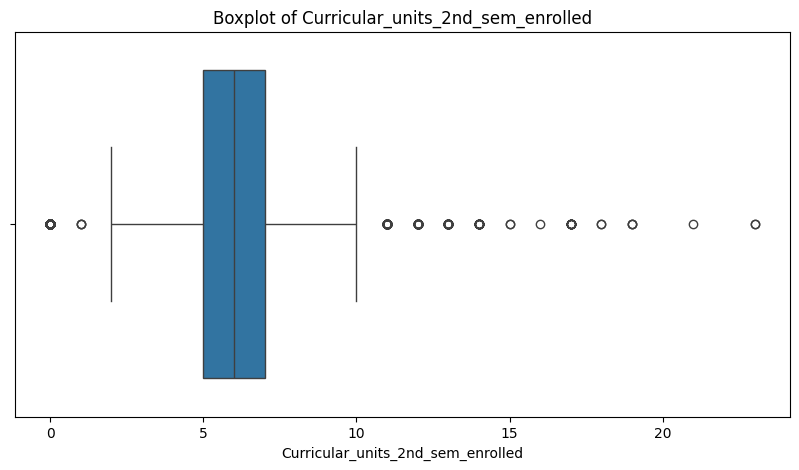

Curricular_units_2nd_sem_evaluations:
 Lower Bound: 0.0
 Upper Bound: 16.0
 Number of Outliers: 109
 Outliers: [17 17 17 17 19 19 19 19 18 17 19 19 19 21 26 21 18 27 19 19 19 21 17 17
 22 21 17 18 17 18 18 17 17 18 20 18 20 21 17 17 21 21 18 24 18 22 21 18
 28 23 18 24 23 18 18 17 20 26 17 22 20 19 18 17 22 22 22 19 18 19 22 21
 23 21 20 23 22 19 17 17 25 18 33 19 20 19 19 17 17 17 18 17 18 18 17 18
 18 20 22 18 22 27 26 20 24 17 19 19 17]



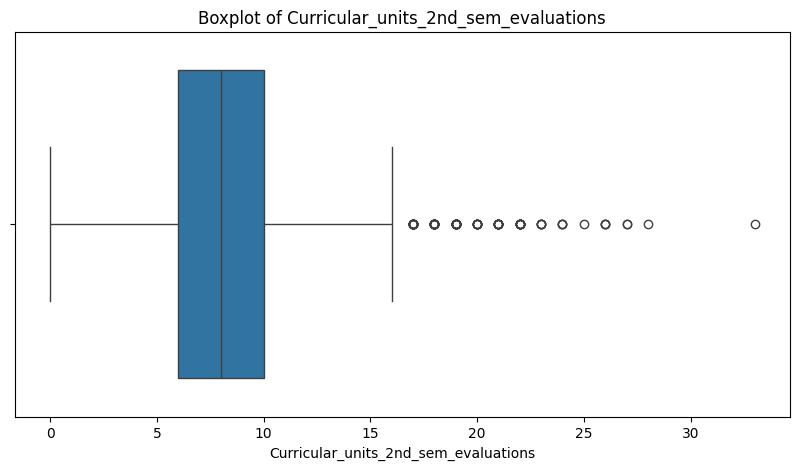

Curricular_units_2nd_sem_approved:
 Lower Bound: -4.0
 Upper Bound: 12.0
 Number of Outliers: 44
 Outliers: [13 19 13 13 17 13 13 13 14 13 13 17 17 13 17 13 13 13 17 13 14 20 14 13
 17 14 13 19 17 13 16 14 20 13 13 13 13 18 18 14 16 13 17 19]



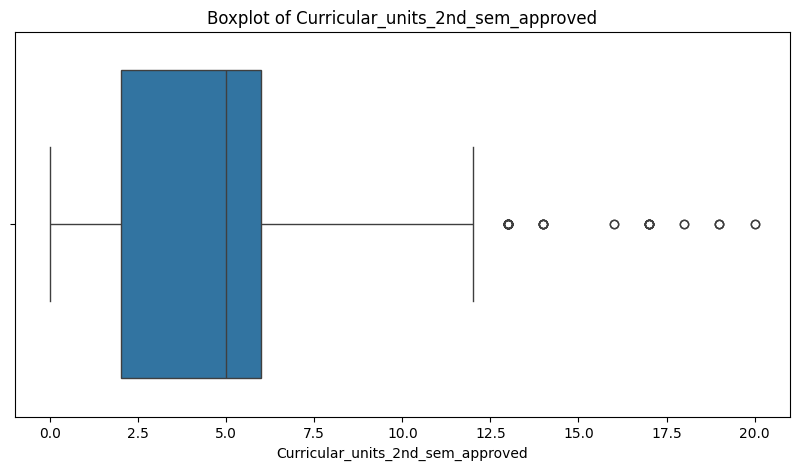

Curricular_units_2nd_sem_grade:
 Lower Bound: 6.874999999999999
 Upper Bound: 17.208333333333336
 Number of Outliers: 877
 Outliers: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         17.5875
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.  

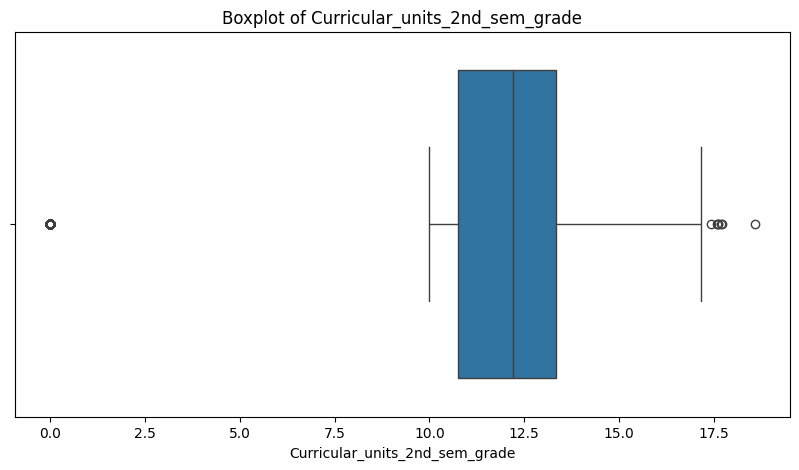

Curricular_units_2nd_sem_without_evaluations:
 Lower Bound: 0.0
 Upper Bound: 0.0
 Number of Outliers: 282
 Outliers: [ 5  2  2  1  3  1  1  1  2  1  2  6  3  3  2  2  2  2  2  3  4  2  1  1
  4  3  4 12  1  4  1  6  1  2  2  2  3  6  1  1  2  2  1  1  1  1  5  4
  5  1  2  1  1  1  1  4  2  1  1  3  2  7  1  1  1  3  1  1  5  4  7  1
  2  4  1  2  1  3  2  1  1  3  1  1  1  4  1  5  1  1  2  2  1  2  8  1
  1  1  2  2  2  2  2  2  4  1  2  1  6  1  7  3  3  3  5  1  3  8  1  1
  2  1  1  1  1  2  1  1  1  1  2  1  2  8  1  1  2  3  1  4  3  4  5  1
  1  1  2  1  1  8  1  1  1  3  3  1  1  1  4  1  3  1  3  1  1  1  1  1
  1  1  1  3  3  1  5  6  1  3  6  1  4  1  1  1  1  7  8  1  5  1  7  5
  4  1  1  1  1  1  2  1  3  3  1  4  5  4  1  1  2  1  2  1  5  2  8  5
  1  2  1  1  6  3  1  1  1  1  3 12  1  2  1  1  2  2  4  1  4  4  3  2
  3  1  5  1  5  6  1  2  1  1  5  1  1  1  1  1  3  1  3  1  1  1  1  3
  1  1  5  4  1  3  3  1  1  3  1  1  1  1  1  2  1  1]



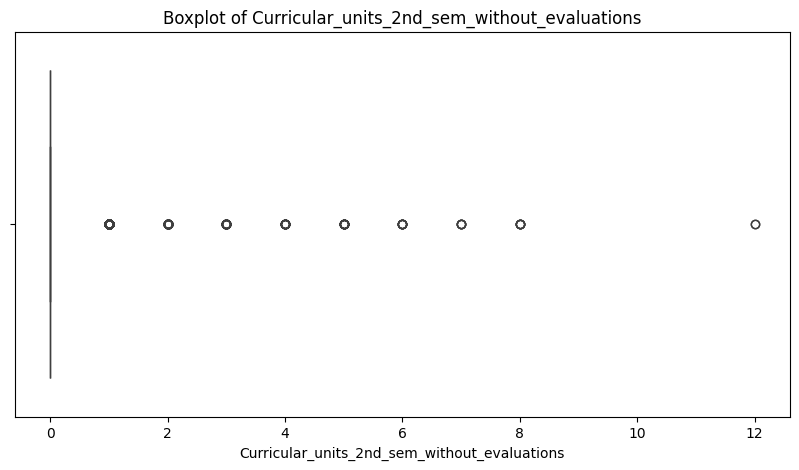

Unemployment_rate:
 Lower Bound: 2.6500000000000004
 Upper Bound: 20.65
 Number of Outliers: 0
 Outliers: []



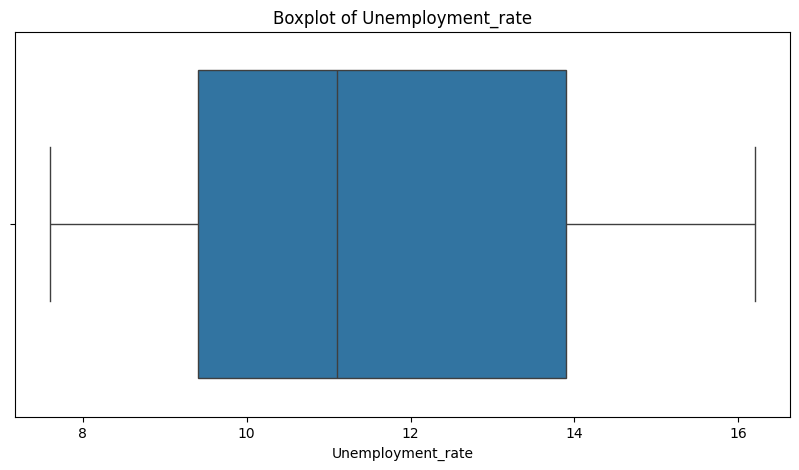

Inflation_rate:
 Lower Bound: -3.1500000000000004
 Upper Bound: 6.050000000000001
 Number of Outliers: 0
 Outliers: []



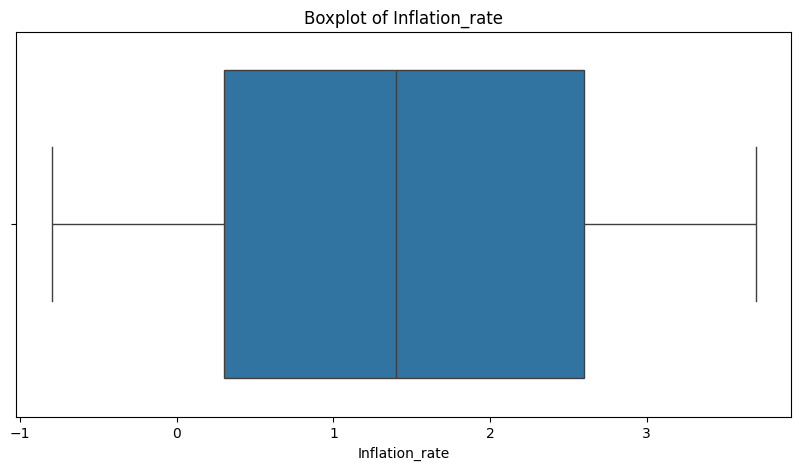

GDP:
 Lower Bound: -6.9350000000000005
 Upper Bound: 7.025
 Number of Outliers: 0
 Outliers: []



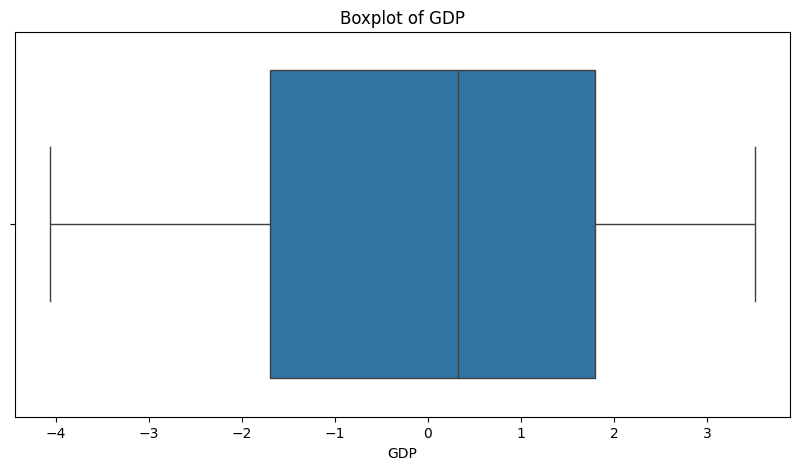

dropout:
 Lower Bound: -1.5
 Upper Bound: 2.5
 Number of Outliers: 0
 Outliers: []



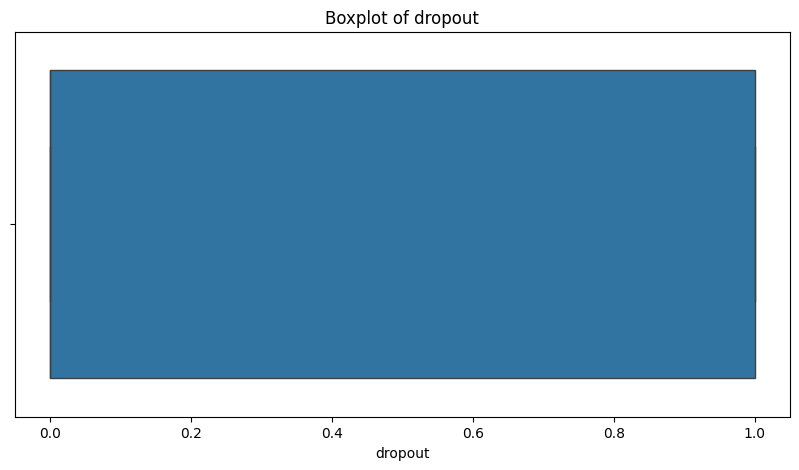

In [265]:
outliers = detect_outliers(student_df)

In [266]:
student_df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [267]:
student_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,dropout
1159,1,1,1,9147,1,1,121.0,1,19,19,...,0,5,7,5,13.285714,0,11.1,0.6,2.02,0
2814,1,1,1,171,1,1,143.0,1,3,38,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,0
3609,1,1,1,171,1,1,133.1,1,1,37,...,0,0,0,0,0.000000,0,15.5,2.8,-4.06,0
4386,1,17,1,9670,1,1,118.0,1,37,38,...,0,5,5,2,12.500000,0,7.6,2.6,0.32,1
738,1,1,1,171,1,1,137.0,1,1,3,...,4,11,15,10,11.181818,0,8.9,1.4,3.51,0


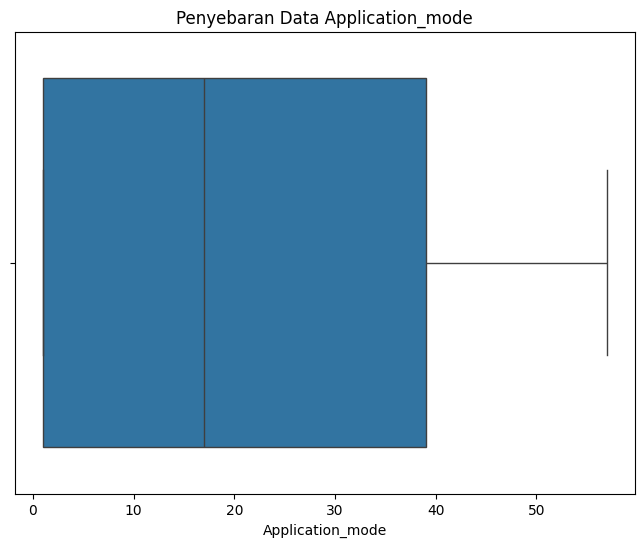

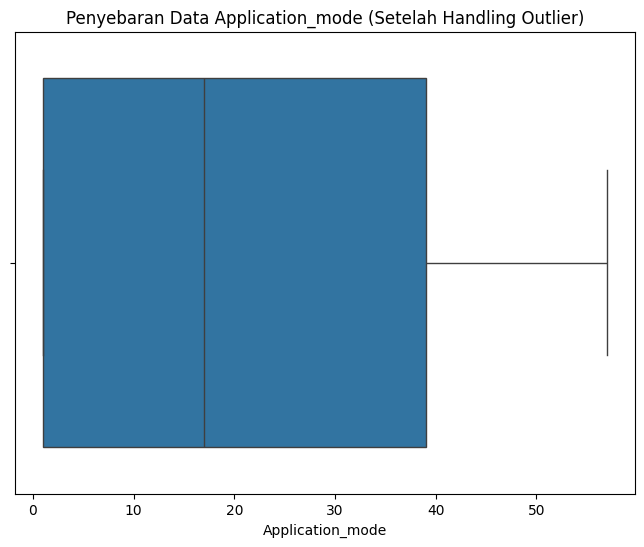

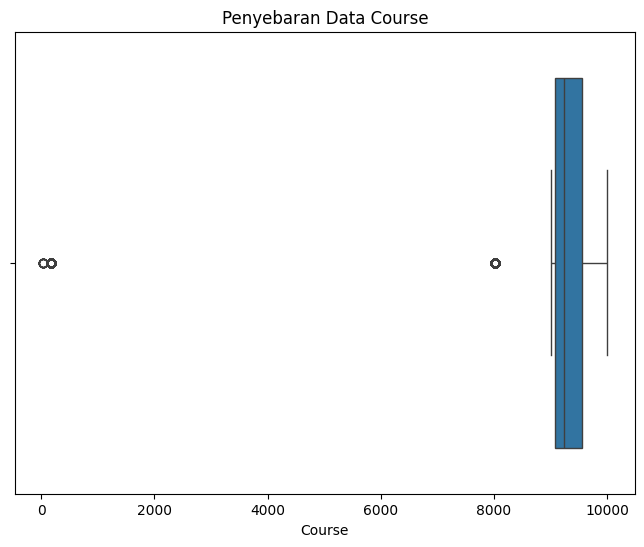

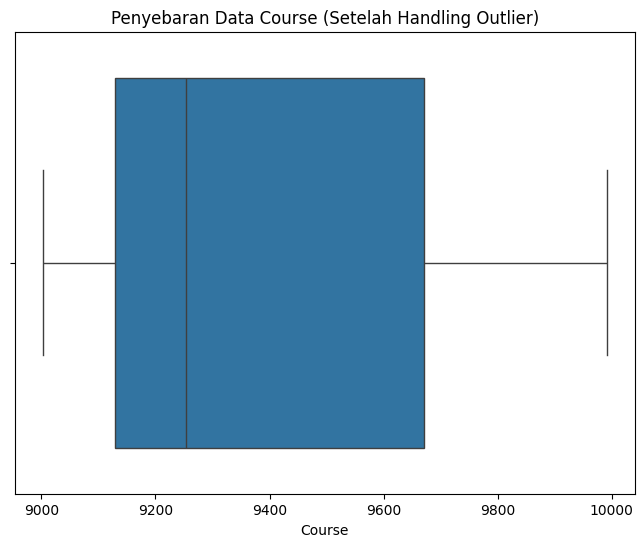

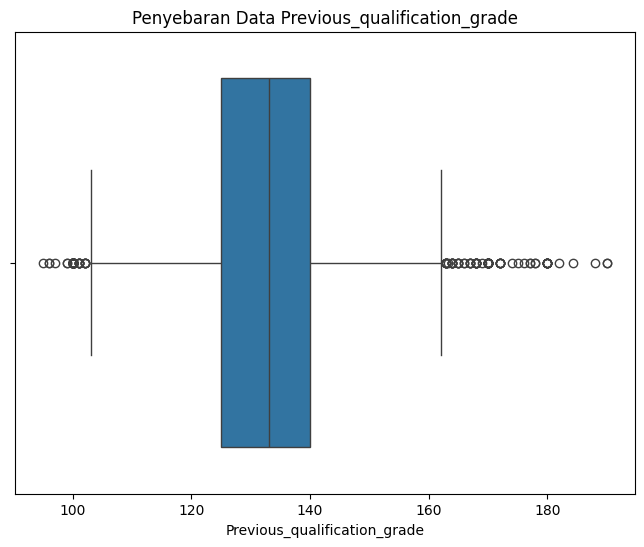

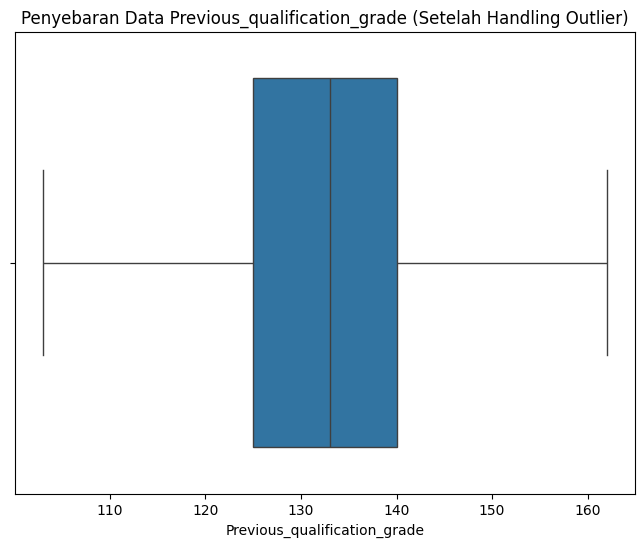

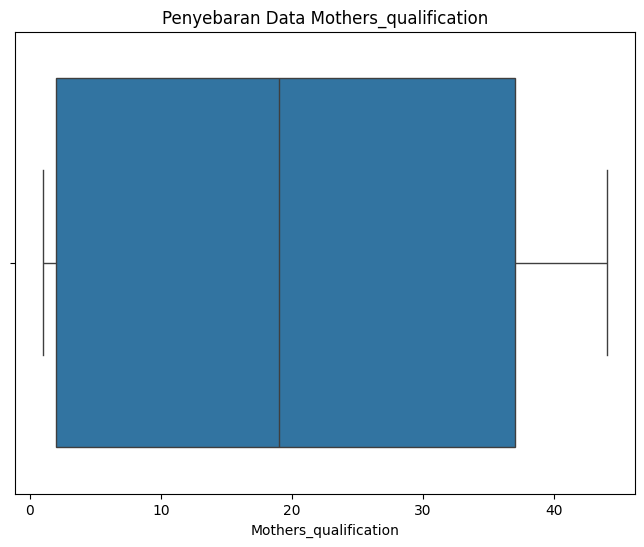

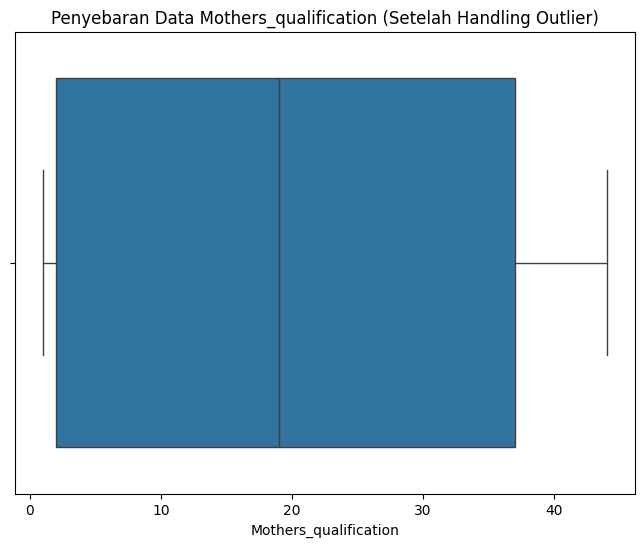

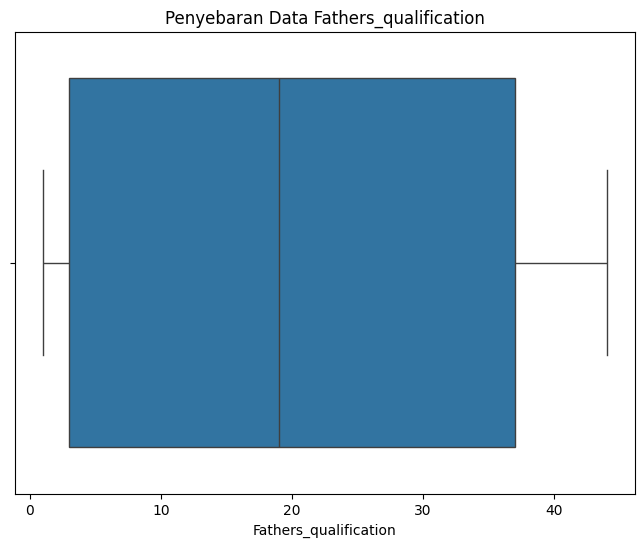

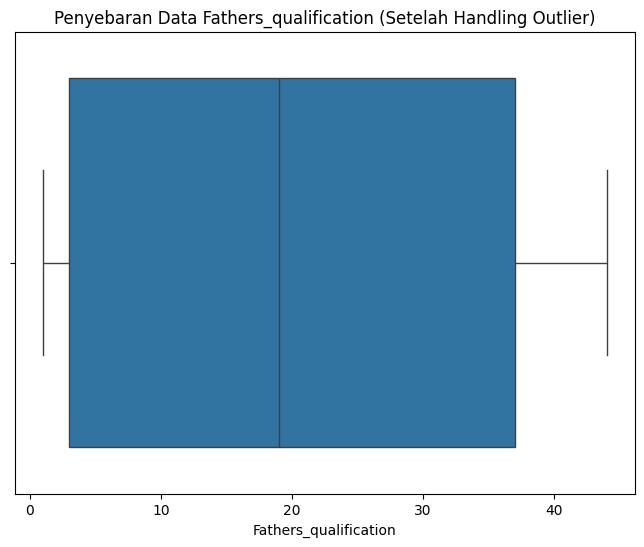

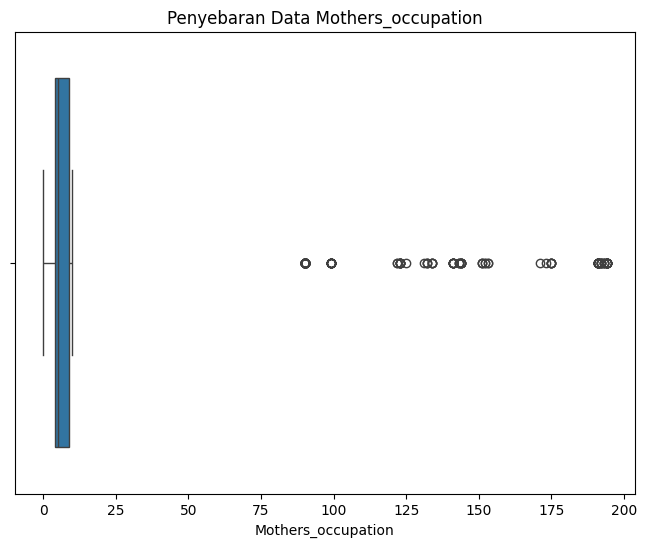

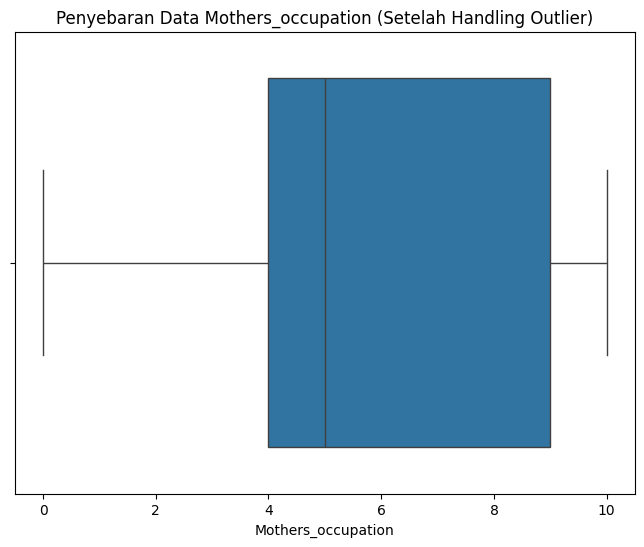

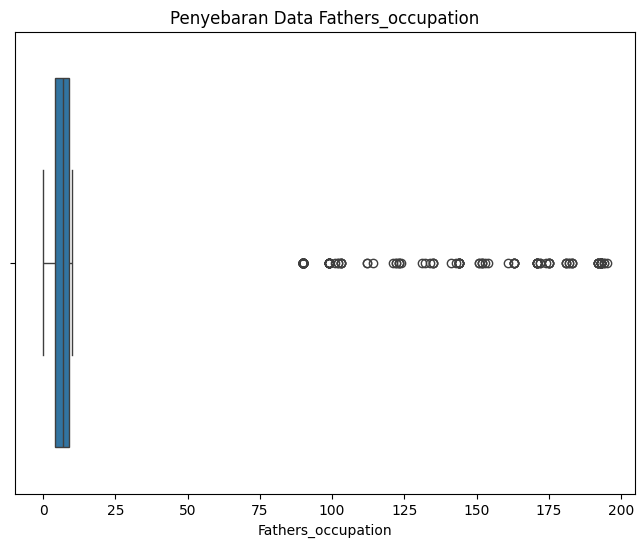

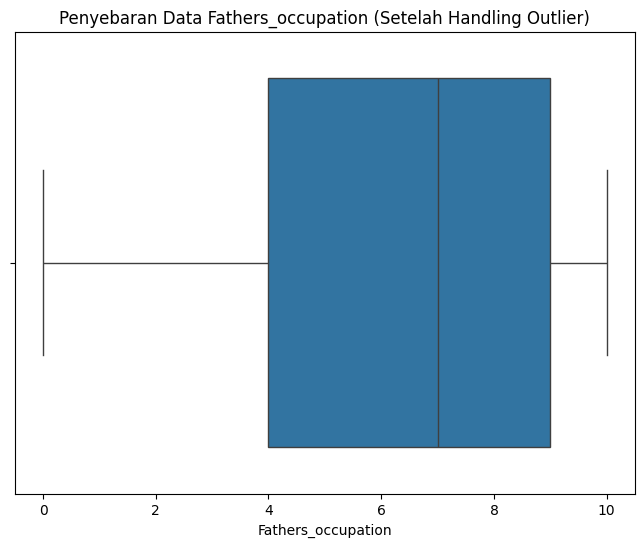

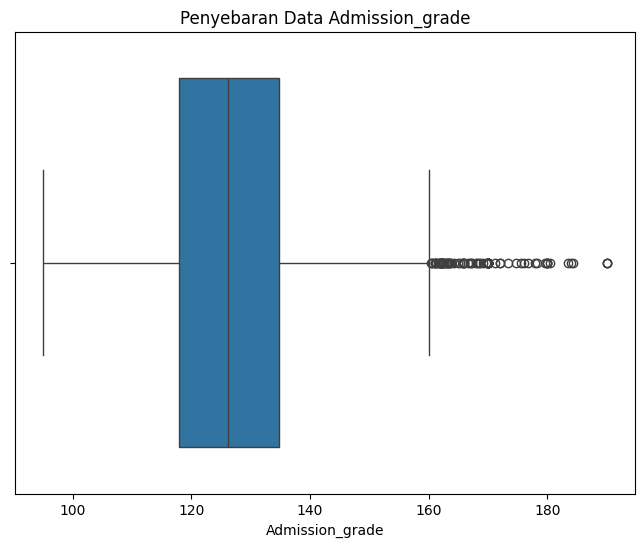

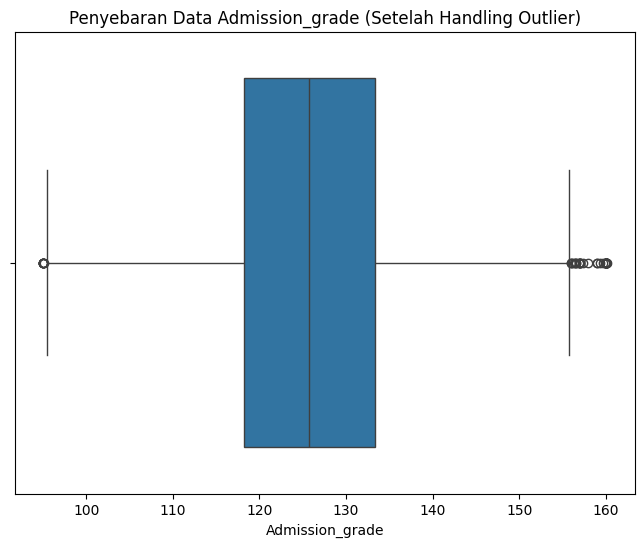

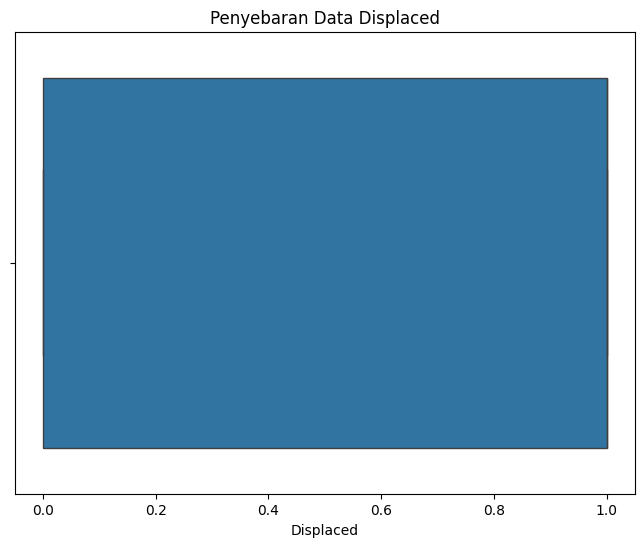

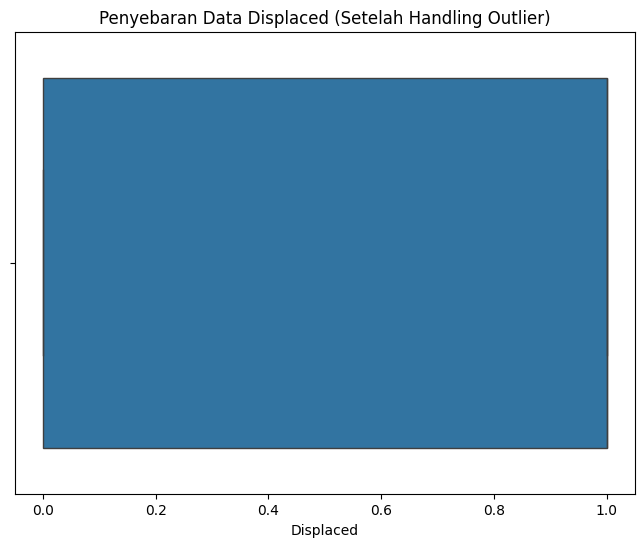

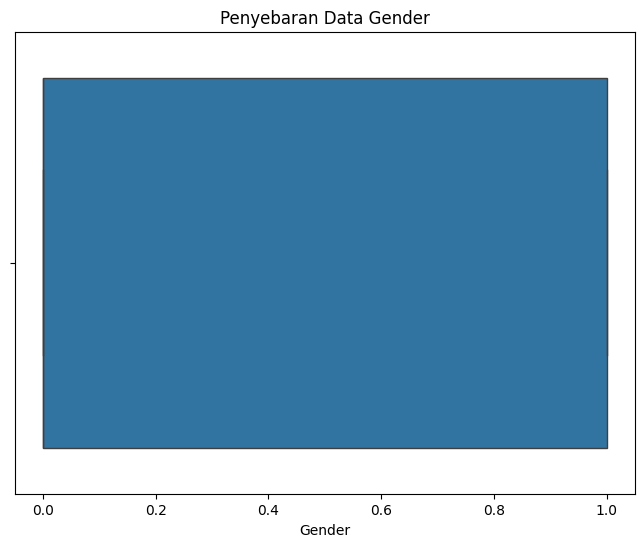

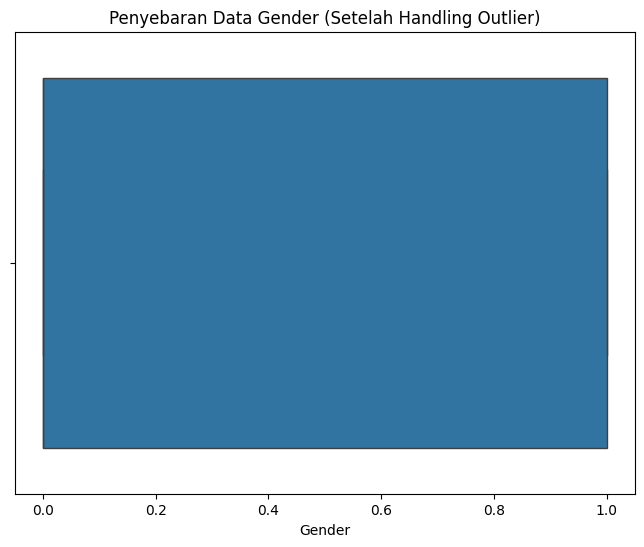

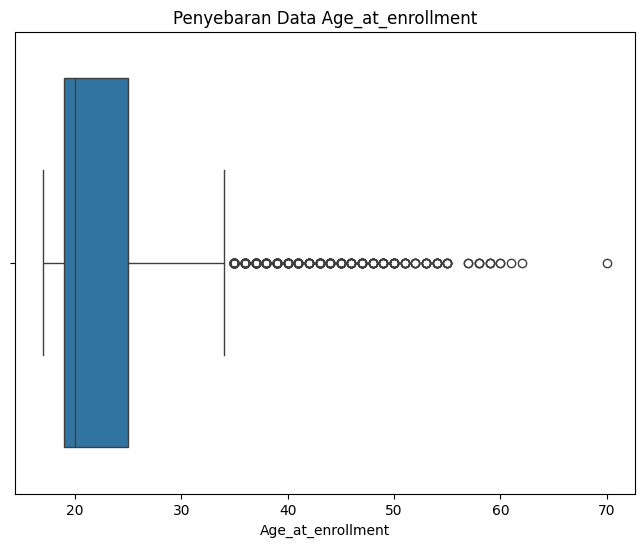

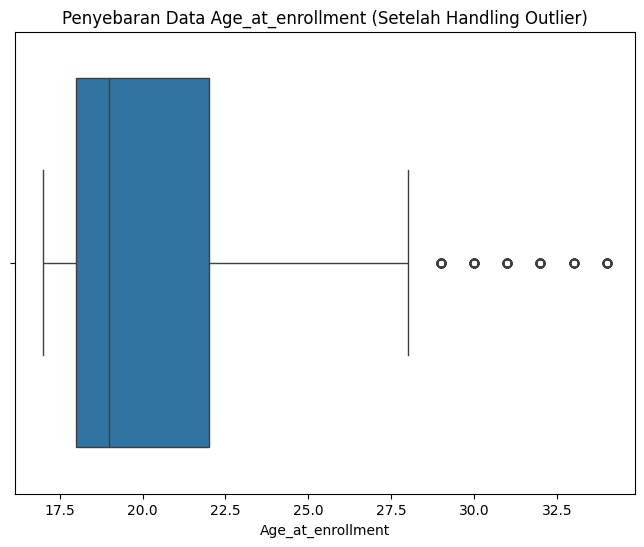

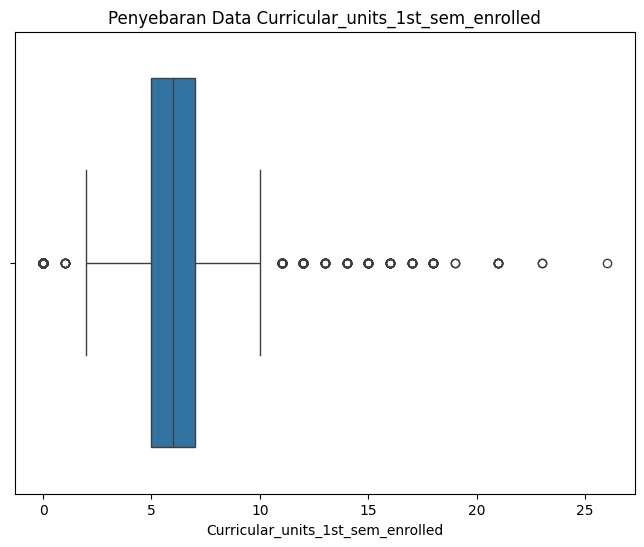

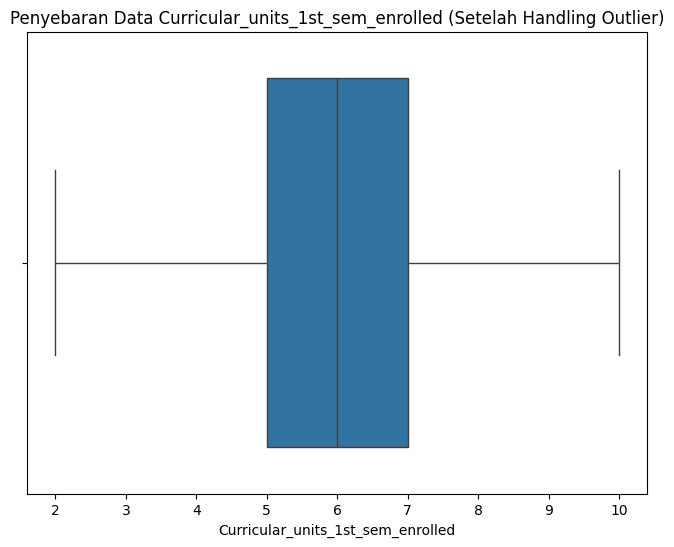

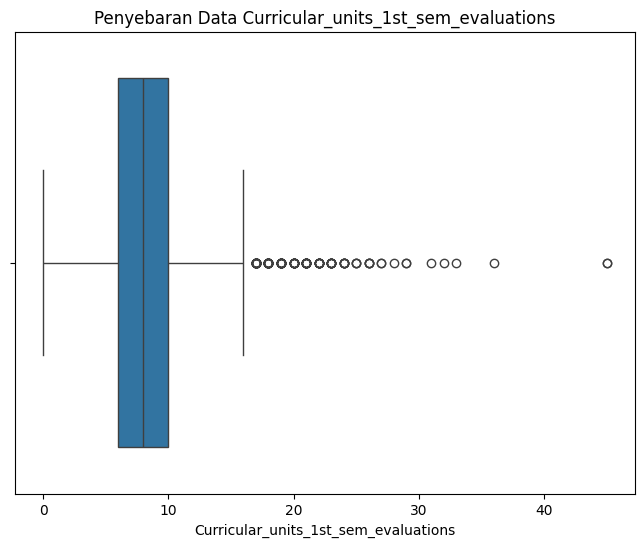

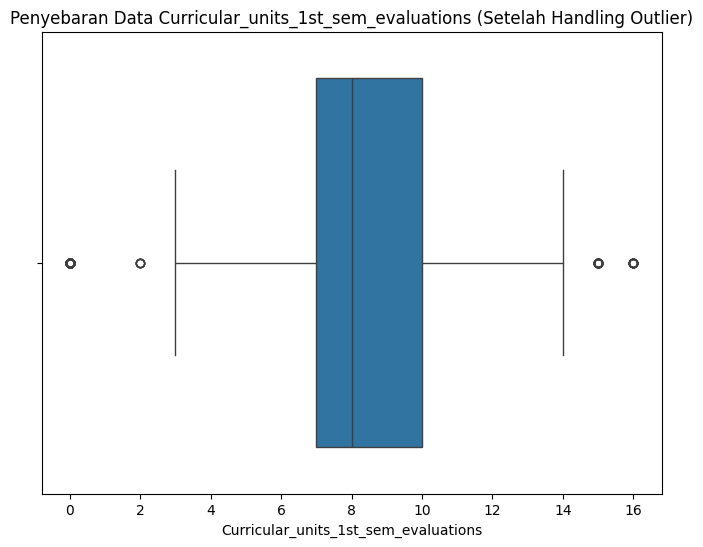

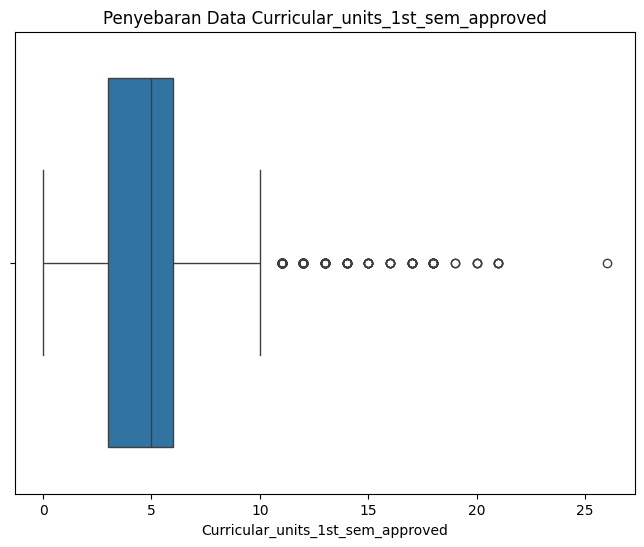

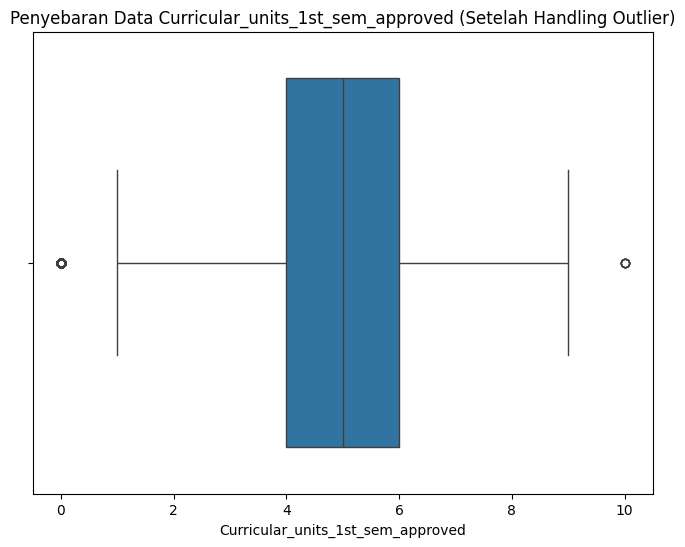

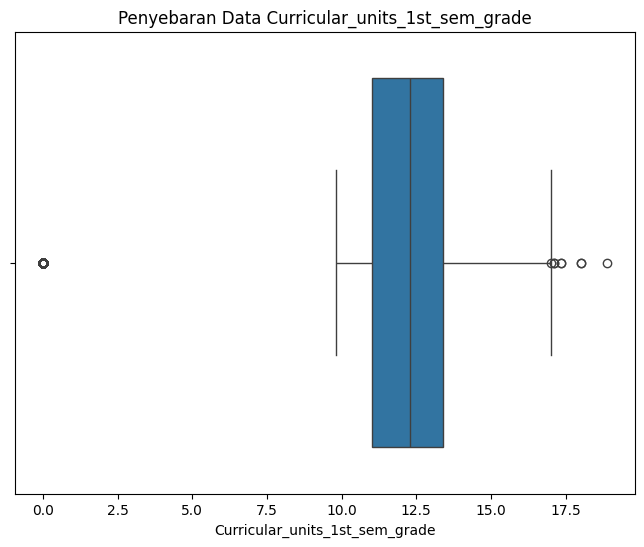

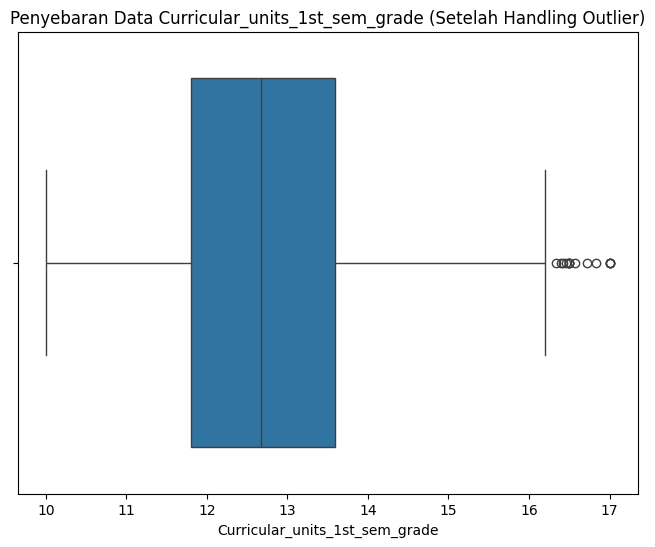

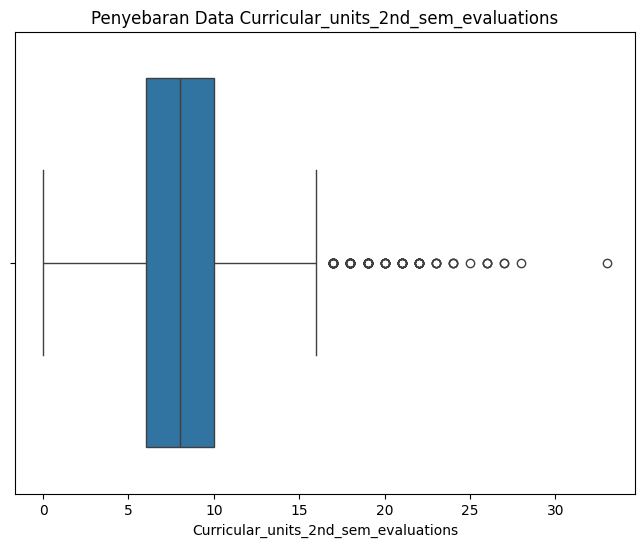

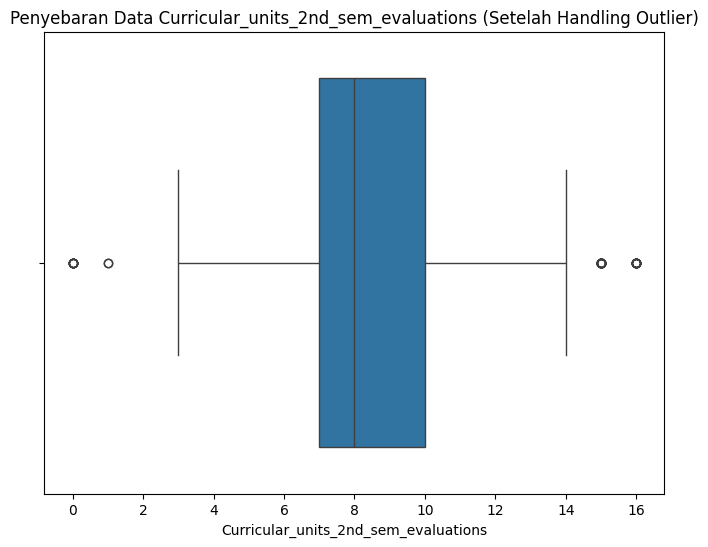

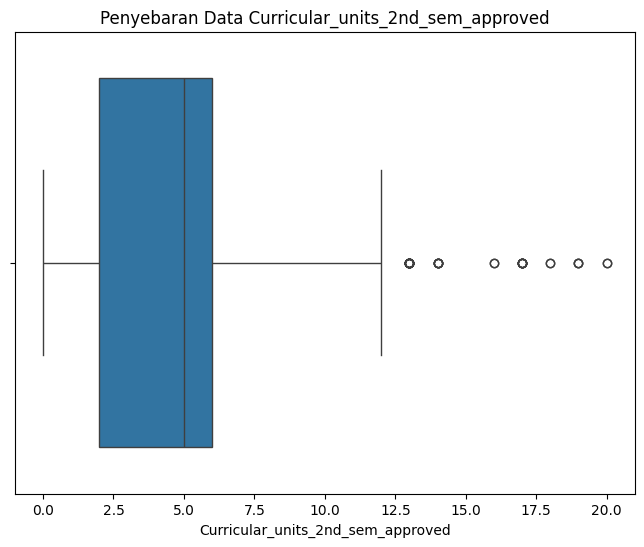

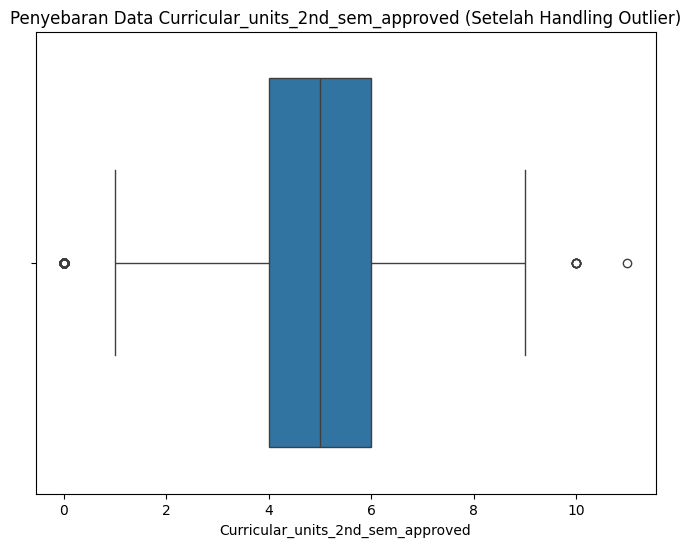

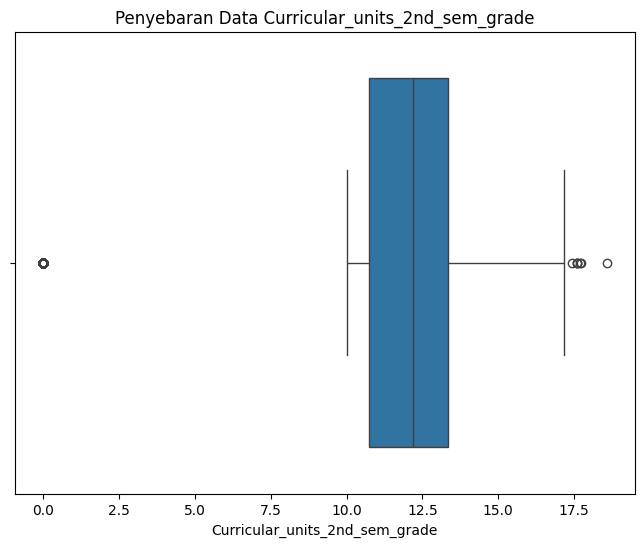

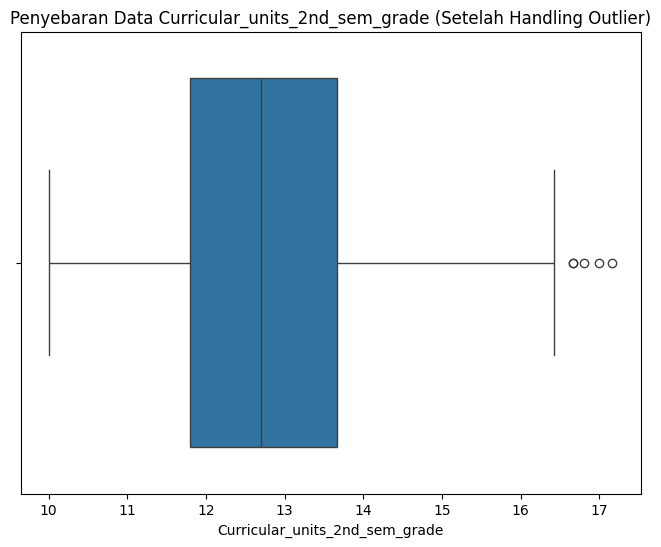

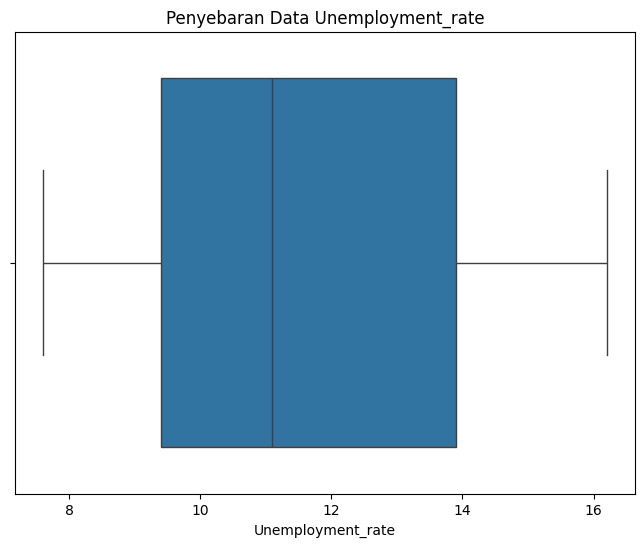

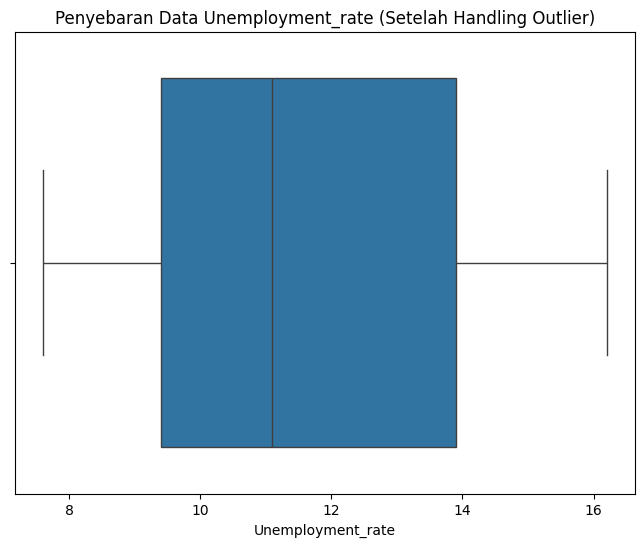

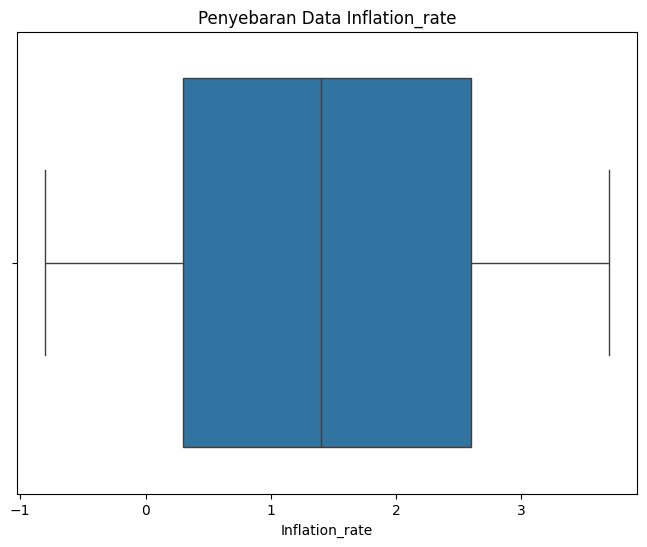

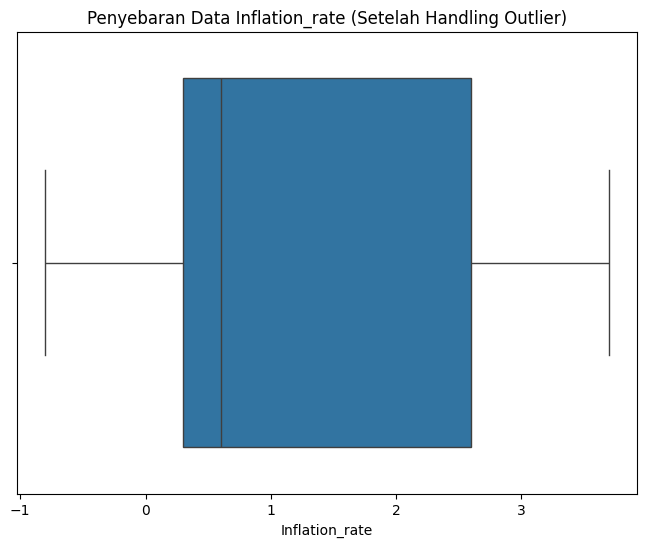

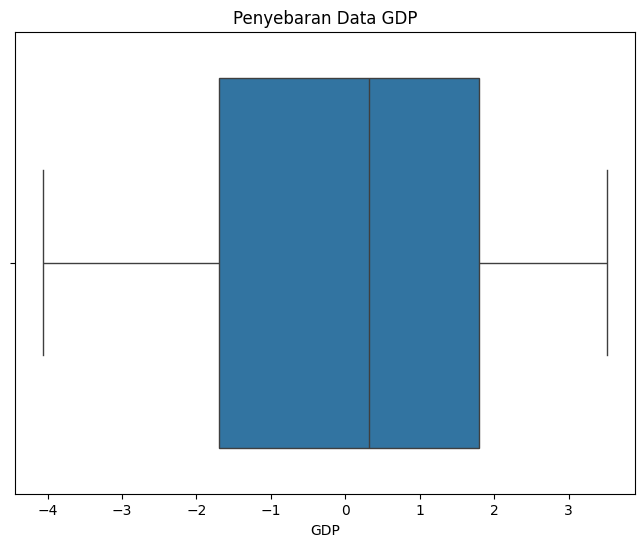

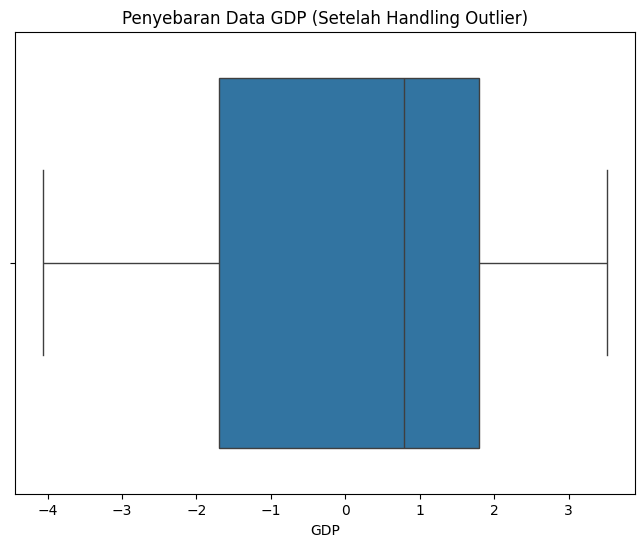

      Marital_status  Application_mode  Application_order  Course  \
1                  1                15                  1    9254   
3                  1                17                  2    9773   
6                  1                 1                  1    9500   
8                  1                 1                  3    9238   
9                  1                 1                  1    9238   
...              ...               ...                ...     ...   
4418               1                44                  1    9070   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
1                              1                       1   
3                              1                   

In [268]:
# Daftar kolom yang akan diolah
kolom_kolom = ['Application_mode', 'Course',
       'Previous_qualification_grade', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Gender',
       'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Unemployment_rate',
       'Inflation_rate', 'GDP']

# Salinan data untuk difilter
data_filtered = student_df.copy()

for kolom in kolom_kolom:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=student_df[kolom], orient='h')
    plt.title('Penyebaran Data {}'.format(kolom))
    plt.xlabel(kolom)
    plt.show()

    # Handling outlier menggunakan metode IQR
    Q1 = student_df[kolom].quantile(0.25)
    Q3 = student_df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering data berdasarkan IQR
    data_filtered = data_filtered[(data_filtered[kolom] >= Q1 - 1.5 * IQR) & (data_filtered[kolom] <= Q3 + 1.5 * IQR)]

    # Menampilkan boxplot setelah handling outlier
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_filtered[kolom], orient='h')
    plt.title('Penyebaran Data {} (Setelah Handling Outlier)'.format(kolom))
    plt.xlabel(kolom)
    plt.show()

# Menampilkan data setelah handling outlier untuk semua kolom
print(data_filtered)

In [269]:
# Menghitung nilai korelasi
correlation_matrix = data_filtered.corr()
print("Nilai Korelasi:\n", correlation_matrix)

Nilai Korelasi:
                                               Marital_status  \
Marital_status                                      1.000000   
Application_mode                                    0.168525   
Application_order                                  -0.076152   
Course                                              0.081916   
Daytime_evening_attendance                         -0.186790   
Previous_qualification                              0.041090   
Previous_qualification_grade                        0.054086   
Nacionality                                        -0.003288   
Mothers_qualification                               0.098284   
Fathers_qualification                               0.057264   
Mothers_occupation                                  0.060204   
Fathers_occupation                                  0.035138   
Admission_grade                                     0.059333   
Displaced                                          -0.156179   
Educational_special_nee

In [270]:
low_correlation_columns = []

for column in data_filtered.columns:
    if abs(correlation_matrix[column]['dropout']) < 0.1:
        low_correlation_columns.append(column)

print("Kolom dengan nilai korelasi rendah (<0.1):", low_correlation_columns)


Kolom dengan nilai korelasi rendah (<0.1): ['Marital_status', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'International', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']


In [271]:
data_filtered.drop(low_correlation_columns, axis=1, inplace=True)


In [272]:
data_filtered.sample(5)

,Application_mode,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,dropout
1098,1,0,1,0,1,20,0,7,6,12.666667,0,6,6,6,12.833333,0
730,1,1,0,1,1,18,0,11,5,12.166667,0,6,15,3,12.000000,1
3614,15,1,1,1,0,24,2,8,7,13.142857,1,6,8,6,11.833333,0
1289,1,0,1,1,0,22,0,8,6,14.333333,0,8,9,7,13.771429,0
1869,1,0,1,1,0,19,0,6,6,11.666667,0,6,10,3,12.666667,0


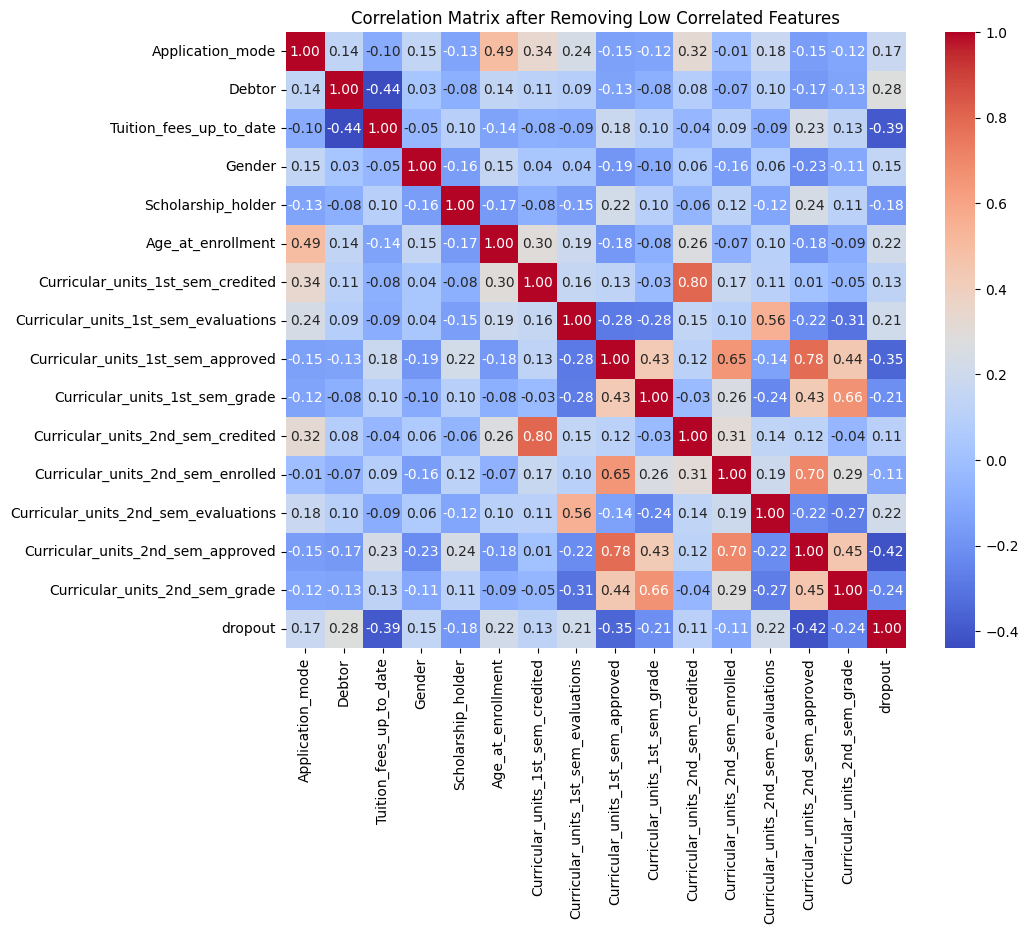

In [273]:
correlation_matrix = data_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix after Removing Low Correlated Features")
plt.show()


## **Modeling**

In [274]:
data_filtered.columns

Index(['Application_mode', 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
       'Scholarship_holder', 'Age_at_enrollment',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'dropout'],
      dtype='object')

In [275]:
#  Pilih fitur (misalnya berdasarkan relevansi atau lainnya)
selected_features = ['Application_mode', 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                     'Scholarship_holder', 'Age_at_enrollment',
                     'Curricular_units_1st_sem_credited',
                     'Curricular_units_1st_sem_evaluations',
                     'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                     'Curricular_units_2nd_sem_enrolled',
                     'Curricular_units_2nd_sem_evaluations',
                     'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']


In [276]:
# Pisahkan atribut dan target
X = data_filtered[selected_features]
y = data_filtered['dropout']

# Bagi data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical features
numeric_features = ['Age_at_enrollment',
                    'Curricular_units_1st_sem_credited',
                    'Curricular_units_1st_sem_evaluations',
                    'Curricular_units_1st_sem_approved',
                    'Curricular_units_1st_sem_grade',
                    'Curricular_units_2nd_sem_enrolled',
                    'Curricular_units_2nd_sem_evaluations',
                    'Curricular_units_2nd_sem_approved',
                    'Curricular_units_2nd_sem_grade']

categorical_features = ['Application_mode', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder']

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [277]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and evaluate models
accuracy_scores = {}

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

best_model_name, best_model_score = max(accuracy_scores.items(), key=lambda item: item[1])

print(f"Best Model: {best_model_name} with accuracy score of {best_model_score:.2f}")


Decision Tree Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       443
           1       0.47      0.43      0.45        95

    accuracy                           0.81       538
   macro avg       0.68      0.66      0.67       538
weighted avg       0.81      0.81      0.81       538

[[397  46]
 [ 54  41]]

Random Forest Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       443
           1       0.72      0.40      0.51        95

    accuracy                           0.87       538
   macro avg       0.80      0.68      0.72       538
weighted avg       0.85      0.87      0.85       538

[[428  15]
 [ 57  38]]

XGBoost Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       443
           1       0.68      0.41      0.51        95

    accuracy                           0.86       538

In [278]:
# prompt: create fitur yang sangan penting dalam prediksi

# Identify the most important features for predicting dropout
most_important_features = []

model = models[best_model_name]
importances = model.feature_importances_

# Create a list of (feature, importance) tuples
feature_importances = [(feature, importance) for feature, importance in zip(X_train.columns, importances)]

# Sort the features by importance in descending order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Extract the top n most important features
n = 5
most_important_features = [feature for feature, importance in feature_importances[:n]]

print(f"Top {n} most important features for predicting dropout:")
for feature in most_important_features:
    print(f"\t- {feature}")


Top 5 most important features for predicting dropout:
	- Curricular_units_1st_sem_approved
	- Curricular_units_1st_sem_evaluations
	- Scholarship_holder
	- Gender
	- Application_mode


In [279]:
best_model = models[best_model_name]
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', best_model)])
best_pipeline.fit(X_train, y_train)

joblib.dump(best_pipeline, 'model_dropout.joblib')
data_filtered.to_csv('prediction_dataset.csv', index=False)

## **Evaluation**

In [280]:
# prompt: lakukan evaluasi

import pandas as pd
# Load the saved model
model = joblib.load('model_dropout.joblib')

# Load the test data
data_test = pd.read_csv('prediction_dataset.csv')

# Select the features used for training
X_test = data_test[selected_features]

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(data_test['dropout'], y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print(classification_report(data_test['dropout'], y_pred))

# Print the confusion matrix
print(confusion_matrix(data_test['dropout'], y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2215
           1       0.97      0.88      0.92       474

    accuracy                           0.97      2689
   macro avg       0.97      0.94      0.95      2689
weighted avg       0.97      0.97      0.97      2689

[[2200   15]
 [  58  416]]


## Prediksi

In [281]:
data_filtered.sample(10)

,Application_mode,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,dropout
4003,1,0,1,1,1,18,0,7,6,13.516667,0,7,7,6,13.516667,0
2825,17,0,1,0,0,19,0,8,6,11.333333,0,6,12,4,13.750000,1
3443,1,0,1,0,0,18,0,6,6,13.833333,0,6,6,6,12.666667,0
3176,1,0,1,0,1,19,0,9,6,12.428571,0,8,8,8,14.000000,0
3980,17,0,1,0,1,18,0,7,6,12.142857,0,6,6,6,13.333333,0
2093,1,0,1,0,0,18,0,7,6,15.200000,0,7,7,6,15.200000,0
2691,1,0,1,1,0,19,0,8,5,11.600000,0,5,10,4,13.500000,0
3619,17,0,1,0,1,21,0,7,6,13.333333,0,6,7,6,13.500000,0
2808,1,0,1,0,1,18,0,6,6,12.166667,0,6,8,6,12.666667,0
3895,1,0,1,1,1,18,0,7,6,13.183333,0,7,7,6,13.183333,0


In [282]:
data_filtered.columns

Index(['Application_mode', 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
       'Scholarship_holder', 'Age_at_enrollment',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'dropout'],
      dtype='object')

In [283]:
data_filtered.shape

(2689, 16)

In [284]:
data_filtered['Application_mode'].unique()

array([15, 17,  1, 53, 18, 44, 39, 42, 51, 43,  7, 16,  5, 10])

In [285]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2689 entries, 1 to 4423
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Application_mode                      2689 non-null   int64  
 1   Debtor                                2689 non-null   int64  
 2   Tuition_fees_up_to_date               2689 non-null   int64  
 3   Gender                                2689 non-null   int64  
 4   Scholarship_holder                    2689 non-null   int64  
 5   Age_at_enrollment                     2689 non-null   int64  
 6   Curricular_units_1st_sem_credited     2689 non-null   int64  
 7   Curricular_units_1st_sem_evaluations  2689 non-null   int64  
 8   Curricular_units_1st_sem_approved     2689 non-null   int64  
 9   Curricular_units_1st_sem_grade        2689 non-null   float64
 10  Curricular_units_2nd_sem_credited     2689 non-null   int64  
 11  Curricular_units_2nd_s

In [286]:
# prompt: buat prediksi dropout

import pandas as pd
def predict_dropout(data_filtered):
  # Load the saved model
  model = joblib.load('model_dropout.joblib')

  # Select the features used for training
  selected_features = ['Application_mode', 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                     'Scholarship_holder', 'Age_at_enrollment',
                     'Curricular_units_1st_sem_credited',
                     'Curricular_units_1st_sem_evaluations',
                     'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                     'Curricular_units_2nd_sem_enrolled',
                     'Curricular_units_2nd_sem_evaluations',
                     'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']

  # Extract the selected features from the data_filtered
  X_test = data_filtered[selected_features]

  # Make predictions on the test data
  y_pred = model.predict(X_test)

  # Return the predicted dropout values
  return y_pred

# Example usage
data_filtered = pd.read_csv('prediction_dataset.csv')
predicted_dropout = predict_dropout(data_filtered)

# Print the predicted dropout values
print(predicted_dropout)


[0 0 0 ... 1 1 0]
